# Capítulo 1: Introduction to Econometrics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd


In [3]:


wage1 = wooldridge.data('wage1')
bwght = wooldridge.data('bwght')
meap01 = wooldridge.data('meap01')
jtrain2 = wooldridge.data('jtrain2')
fertil2 = wooldridge.data('fertil2')


 C1 Use the data in WAGE1.RAW for this exercise.
 
(i) Find the average education level in the sample. What are the lowest and highest 
years of education?

(ii) Find the average hourly wage in the sample. Does it seem high or low?


(iii) The wage data are reported in 1976 dollars. Using the Economic Report of the 
President (2011 or later), obtain and report the Consumer Price Index (CPI) for 
the years 1976 and 2010.

(iv) Use the CPI values from part (iii) to find the average hourly wage in 2010 dollars. 
Now does the average hourly wage seem reasonable?

(v) How many women are in the sample? How many men?

In [5]:
print (wage1.head(5))
print (wage1.shape)
# print the names of the columns
print (wage1.columns)
# 


   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1.175573      48

In [9]:
# Average education level in the sample
print (f"Average education level in the sample: {wage1['educ'].mean()}")
# Lowest and highest years of education
print (f"Lowest years of education: {wage1['educ'].min()}")
print (f"Highest years of education: {wage1['educ'].max()}")

# Average hourly wage in the sample
print (f"Average hourly wage in the sample: {wage1['wage'].mean()}")

# CPI for the years 1976 and 2024
cpi_1976 = 56.9  # CPI promedio de 1976
cpi_2024 = 309.686  # CPI de marzo 2024 (último dato disponible)

# Average hourly wage in 2024 dollars
average_wage_2024 = wage1['wage'].mean() * (cpi_2024 / cpi_1976)
print (f"Average hourly wage in 2024 dollars: {average_wage_2024}")

# How many women are in the sample
print (f"Number of women in the sample: {wage1['female'].sum()}")
 # the number of men is the total number of observations minus the number of women
print (f"Number of men in the sample: {wage1.shape[0] - wage1['female'].sum()}")


Average education level in the sample: 12.562737642585551
Lowest years of education: 0
Highest years of education: 18
Average hourly wage in the sample: 5.896102674787035
Average hourly wage in 2024 dollars: 32.09034187950963
Number of women in the sample: 252
Number of men in the sample: 274


C2 Use the data in BWGHT.RAW to answer this question.

(i) How many women are in the sample, and how many report smoking during 
pregnancy?

(ii) What is the average number of cigarettes smoked per day? Is the average a good 
measure of the “typical” woman in this case? Explain.

(iii) Among women who smoked during pregnancy, what is the average number 
of cigarettes smoked per day? How does this compare with your answer from 
part (ii), and why?

(iv) Find the average of fatheduc in the sample. Why are only 1,192 observations used 
to compute this average?

(v) Report the average family income and its standard deviation in dollars.

In [16]:
# How many women are in the sample, and how many report smoking during pregnancy?
print (f"Number of women in the sample: {bwght.shape[0]}")
print (f"Number of women who report smoking during pregnancy: {bwght[bwght['cigs'] > 0].shape[0]}")

# Average number of cigarettes smoked per day
print (f"Average number of cigarettes smoked per day: {bwght['cigs'].mean()}") # Not representative due to excessive number of 0's

# If cigs is greater than 0, what is the average number of cigarettes smoked per day?
print (f"Average number of cigarettes smoked per day: {bwght[bwght['cigs'] > 0]['cigs'].mean()}")

# Fatheduc count and average
print (f"Average of fatheduc: {bwght['fatheduc'].mean()}")
# Only 1,192 observations used to compute this average because the variable fatheduc has missing values (NaN)

# Average family income and its standard deviation in dollars
print (f"Average family income in 1000's of dollars: {bwght['faminc'].mean()}")
print (f"Standard deviation of family income in 1000's of dollars: {bwght['faminc'].std()}")




Number of women in the sample: 1388
Number of women who report smoking during pregnancy: 212
Average number of cigarettes smoked per day: 2.0871757925072045
Average number of cigarettes smoked per day: 13.665094339622641
Average of fatheduc: 13.186241610738255
Average family income in 1000's of dollars: 29.026657060518733
Standard deviation of family income in 1000's of dollars: 18.73928463224534


C3 The data in MEAP01.RAW are for the state of Michigan in the year 2001. Use these 
data to answer the following questions.

(i) Find the largest and smallest values of math4. Does the range make sense? 
Explain.

(ii) How many schools have a perfect pass rate on the math test? What percentage is 
this of the total sample?
(iii) How many schools have math pass rates of exactly 50%?
(iv) Compare the average pass rates for the math and reading scores. Which test is 
harder to pass?

(v) Find the correlation between math4 and read4. What do you conclude?

(vi) The variable exppp is expenditure per pupil. Find the average of exppp along 
with its standard deviation. Would you say there is wide variation in per pupil 
spending?

(vii) Suppose School A spends $6,000 per student and School B spends $5,500 per 
student. By what percentage does School A’s spending exceed School B’s? Compare this to 100 ·[log(6,000) – log(5,500)], which is the approximation percentage difference based on the difference in the natural logs. 

In [17]:
# Columns of the data and shape
print (f"Columns of the data: {meap01.columns}")
print (f"Shape of the data: {meap01.shape}")



Columns of the data: Index(['dcode', 'bcode', 'math4', 'read4', 'lunch', 'enroll', 'expend',
       'exppp', 'lenroll', 'lexpend', 'lexppp'],
      dtype='object')
Shape of the data: (1823, 11)


In [22]:
# largest and smallest values of math4
print (f"Largest value of math4: {meap01['math4'].max()}")
print (f"Smallest value of math4: {meap01['math4'].min()}")

# How many schools have a perfect pass rate on the math test? What percentage is this of the total sample?
print (f"Number of schools with a perfect pass rate on the math test: {meap01[meap01['math4'] == 100].shape[0]}")
print (f"Percentage of schools with a perfect pass rate on the math test: {(meap01[meap01['math4'] == 100].shape[0] / meap01.shape[0]) * 100}%")

# How many schools have math pass rates of exactly 50%?
print (f"Number of schools with math pass rates of exactly 50%: {meap01[meap01['math4'] == 50].shape[0]}")

# Compare the average pass rates for the math and reading scores. Which test is harder to pass?
print (f"Average pass rate for the math test: {meap01['math4'].mean()}")
print (f"Average pass rate for the reading test: {meap01['read4'].mean()}")

# Find the correlation between math4 and read4. What do you conclude?
print (f"Correlation between math4 and read4: {meap01['math4'].corr(meap01['read4'])}") #the correlation is 0.84, which means that the two tests are highly correlated

# The variable exppp is expenditure per pupil. Find the average of exppp along with its standard deviation. Would you say there is wide variation in per pupil spending?
print (f"Average of exppp: {meap01['exppp'].mean()}")
print (f"Standard deviation of exppp: {meap01['exppp'].std()}")
# The average is 5194.86 and the std is 1091.88, which means that there is a wide variation in per pupil spending

# Suppose School A spends $6,000 per student and School B spends $5,500 per student. By what percentage does School A’s spending exceed School B’s? Compare this to 100 ·[log(6,000) – log(5,500)], which is the approximation percentage difference based on the difference in the natural logs. 
print (f"Percentage difference between School A and School B: {100 * (6000 - 5500) / 5500}%")
print (f"Percentage difference based on the difference in the natural logs: {100 * (np.log(6000) - np.log(5500))}")







Largest value of math4: 100.0
Smallest value of math4: 0.0
Number of schools with a perfect pass rate on the math test: 38
Percentage of schools with a perfect pass rate on the math test: 2.084476138233681%
Number of schools with math pass rates of exactly 50%: 17
Average pass rate for the math test: 71.90899606805154
Average pass rate for the reading test: 60.06187602862904
Correlation between math4 and read4: 0.842728145772116
Average of exppp: 5194.865478314741
Standard deviation of exppp: 1091.8895972167838
Percentage difference between School A and School B: 9.090909090909092%
Percentage difference based on the difference in the natural logs: 8.701137698962924


The data in JTRAIN2.RAW come from a job training experiment conducted for lowincome men during 1976–1977; see Lalonde (1986).

(i) Use the indicator variable train to determine the fraction of men receiving job 
training.

(ii) The variable re78 is earnings from 1978, measured in thousands of 1982 dollars. 
Find the averages of re78 for the sample of men receiving job training and the 
sample not receiving job training. Is the difference economically large?

(iii) The variable unem78 is an indicator of whether a man is unemployed or not in 
1978. What fraction of the men who received job training are unemployed? What 
about for men who did not receive job training? Comment on the difference.

(iv) From parts (ii) and (iii), does it appear that the job training program was effective? 
What would make our conclusions more convincing?

In [23]:
#jtrain2 shape and columns
print (f"Shape of the data: {jtrain2.shape}")
print (f"Columns of the data: {jtrain2.columns}")


Shape of the data: (445, 19)
Columns of the data: Index(['train', 'age', 'educ', 'black', 'hisp', 'married', 'nodegree',
       'mosinex', 're74', 're75', 're78', 'unem74', 'unem75', 'unem78',
       'lre74', 'lre75', 'lre78', 'agesq', 'mostrn'],
      dtype='object')


In [25]:
# Average of re78 for the sample of men receiving job training and the sample not receiving job training
print (f"Average of re78 for the sample of men receiving job training: {jtrain2[jtrain2['train'] == 1]['re78'].mean()}")
print (f"Average of re78 for the sample of men not receiving job training: {jtrain2[jtrain2['train'] == 0]['re78'].mean()}")

# Fraction of the men who received job training and the sample not receiving job training
print (f"Fraction of the men who received job training: {jtrain2[jtrain2['train'] == 1].shape[0] / jtrain2.shape[0]}")
print (f"Fraction of the men who did not receive job training: {jtrain2[jtrain2['train'] == 0].shape[0] / jtrain2.shape[0]}")

# What fraction of the men who received job training are unemployed? What about for men who did not receive job training? Comment on the difference.
print (f"Fraction of the men who received job training and are unemployed: {jtrain2[(jtrain2['train'] == 1) & (jtrain2['unem78'] == 1)].shape[0] / jtrain2[jtrain2['train'] == 1].shape[0]}")
print (f"Fraction of the men who did not receive job training and are unemployed: {jtrain2[(jtrain2['train'] == 0) & (jtrain2['unem78'] == 1)].shape[0] / jtrain2[jtrain2['train'] == 0].shape[0]}")



Average of re78 for the sample of men receiving job training: 6.349145357189951
Average of re78 for the sample of men not receiving job training: 4.554802284088845
Fraction of the men who received job training: 0.4157303370786517
Fraction of the men who did not receive job training: 0.5842696629213483
Fraction of the men who received job training and are unemployed: 0.24324324324324326
Fraction of the men who did not receive job training and are unemployed: 0.35384615384615387


The data in FERTIL2.DTA were collected on women living in the Republic of Botswana 
in 1988. The variable children refers to the number of living children. The variable 
electric is a binary indicator equal to one if the woman’s home has electricity, and 
zero if not.

(i) Find the smallest and largest values of children in the sample. What is the average 
of children?

(ii) What percentage of women have electricity in the home?

(iii) Compute the average of children for those without electricity and do the same for 
those with electricity. Comment on what you find.

(iv) From part (iii), can you infer that having electricity “causes” women to have fewer 
children? Explain

In [27]:
#Shape and columns of the data
print (f"Shape of the data: {fertil2.shape}")
print (f"Columns of the data: {fertil2.columns}")




Shape of the data: (4361, 27)
Columns of the data: Index(['mnthborn', 'yearborn', 'age', 'electric', 'radio', 'tv', 'bicycle',
       'educ', 'ceb', 'agefbrth', 'children', 'knowmeth', 'usemeth', 'monthfm',
       'yearfm', 'agefm', 'idlnchld', 'heduc', 'agesq', 'urban', 'urb_educ',
       'spirit', 'protest', 'catholic', 'frsthalf', 'educ0', 'evermarr'],
      dtype='object')


In [28]:
# Smallest and largest values of children in the sample
print (f"Smallest value of children in the sample: {fertil2['children'].min()}")
print (f"Largest value of children in the sample: {fertil2['children'].max()}")

# Average of children in the sample
print (f"Average of children in the sample: {fertil2['children'].mean()}")


Smallest value of children in the sample: 0
Largest value of children in the sample: 13
Average of children in the sample: 2.2678284797064894


In [30]:
# What percentage of women have electricity in the home?
print (f"Percentage of women who have electricity in the home: {fertil2[fertil2['electric'] == 1].shape[0] / fertil2.shape[0]}")

# Compute the average of children for those without electricity and do the same for those with electricity. Comment on what you find.
print (f"Average of children for those without electricity: {fertil2[fertil2['electric'] == 0]['children'].mean()}")
print (f"Average of children for those with electricity: {fertil2[fertil2['electric'] == 1]['children'].mean()}")

# From part (iii), can you infer that having electricity “causes” women to have fewer 
# children? 
# No because correlation does not imply causation




Percentage of women who have electricity in the home: 0.14010548039440496
Average of children for those without electricity: 2.327728849746464
Average of children for those with electricity: 1.8985270049099836


# Capítulo 2, Regresión simple univariable

## C1

The data in 401K.RAW are a subset of data analyzed by Papke (1995) to study the relationship between participation in a 401(k) pension plan and the generosity of the plan. 

The variable prate is the percentage of eligible workers with an active account; this is the variable we would like to explain. The measure of generosity is the plan match rate, mrate. This variable gives the average amount the firm contributes to each worker’s plan for each $1 contribution by the worker. For example, if mrate = 0.50, then a $1 contribution by the worker is matched by a 50¢ contribution by the firm.

(i) Find the average participation rate and the average match rate in the sample of 
plans.

(ii) Now, estimate the simple regression equation and report the results along with the sample size and R-squared.

(iii) Interpret the intercept in your equation. Interpret the coefficient on mrate.

(iv) Find the predicted prate when mrate 5 3.5. Is this a reasonable prediction? 
Explain what is happening here.

(v) How much of the variation in prate is explained by mrate? Is this a lot in your opinion?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd


In [3]:

# Cargar los datos 401K.RAW
datos_401k = wooldridge.data('401k')

# Mostrar las primeras filas para verificar la carga
print(datos_401k.head())

# Verificar las columnas disponibles
print("\nColumnas en el conjunto de datos:")
print(datos_401k.columns)




        prate  mrate  totpart  totelg  age  totemp  sole   ltotemp
0   26.100000   0.21   1653.0  6322.0    8  8709.0     0  9.072112
1  100.000000   1.42    262.0   262.0    6   315.0     1  5.752573
2   97.599998   0.91    166.0   170.0   10   275.0     1  5.616771
3  100.000000   0.42    257.0   257.0    7   500.0     0  6.214608
4   82.500000   0.53    591.0   716.0   28   933.0     1  6.838405

Columnas en el conjunto de datos:
Index(['prate', 'mrate', 'totpart', 'totelg', 'age', 'totemp', 'sole',
       'ltotemp'],
      dtype='object')


In [4]:

# Ver la estructura de los datos
print("\nEstructura de los datos:")
print(datos_401k.info())

# Mostrar estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(datos_401k.describe())

# Verificar si hay valores nulos
print("\nValores nulos en el conjunto de datos:")
print(datos_401k.isnull().sum())

# Mostrar los tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(datos_401k.dtypes)


Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   prate    1534 non-null   float64
 1   mrate    1534 non-null   float64
 2   totpart  1534 non-null   float64
 3   totelg   1534 non-null   float64
 4   age      1534 non-null   int64  
 5   totemp   1534 non-null   float64
 6   sole     1534 non-null   int64  
 7   ltotemp  1534 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 96.0 KB
None

Estadísticas descriptivas:
             prate        mrate       totpart        totelg          age  \
count  1534.000000  1534.000000   1534.000000   1534.000000  1534.000000   
mean     87.362907     0.731512   1354.230769   1628.534550    13.181226   
std      16.716537     0.779539   4629.264665   5370.719356     9.171114   
min       3.000000     0.010000     50.000000     51.000000     4.000000   
25%      78.025000     0

El promedio de prate es: 87.36
El promedio de mrate es: 0.73


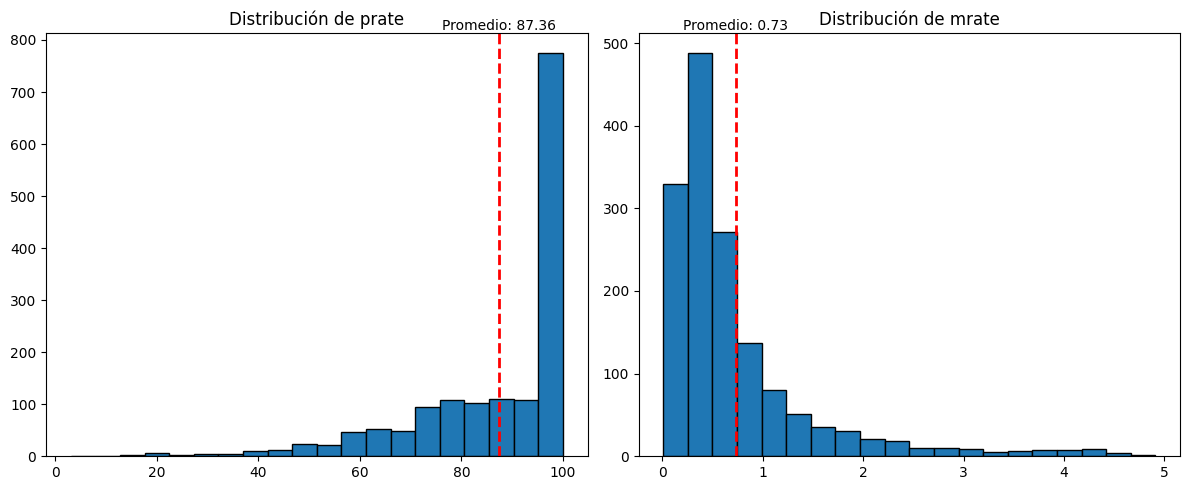

Resultados de la regresión simple:
Intercepto (β₀): 83.0755
Pendiente (β₁): 5.8611
Coeficiente de determinación (R²): 0.0747


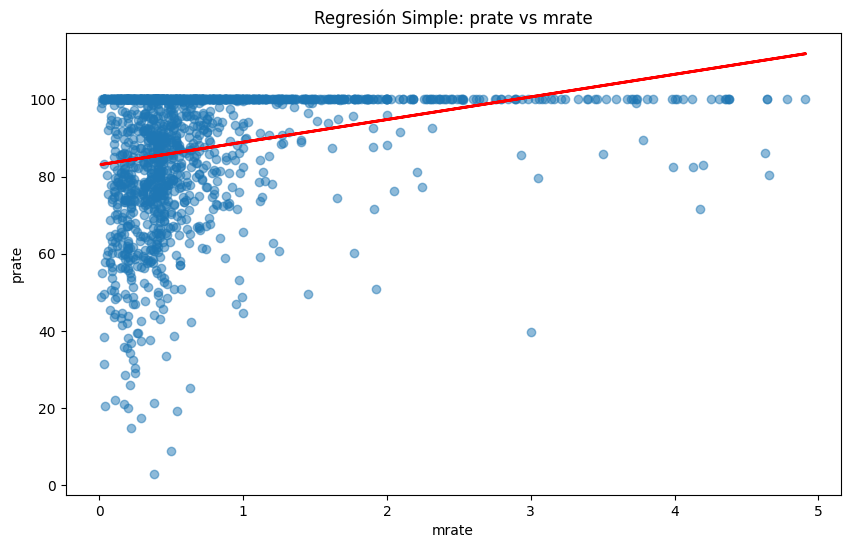

In [6]:
# Estimación de regresión simple: prate (y) vs mrate (x)

# Preparar los datos
X = datos_401k['mrate'].values
y = datos_401k['prate'].values

# Añadir una columna de unos para el término constante
X = np.column_stack((np.ones(len(X)), X))

# Estimar los parámetros usando mínimos cuadrados ordinarios
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extraer los parámetros estimados
beta_0 = beta[0]  # Intercepto
beta_1 = beta[1]  # Pendiente

# Calcular los valores predichos
y_pred = X @ beta

# Calcular el coeficiente de determinación (R^2)
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
R_cuadrado = SSR / SST

# Imprimir los resultados
print("Resultados de la regresión simple:")
print(f"Intercepto (β₀): {beta_0:.4f}")
print(f"Pendiente (β₁): {beta_1:.4f}")
print(f"Coeficiente de determinación (R²): {R_cuadrado:.4f}")

# Visualizar la regresión
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, alpha=0.5)
plt.plot(X[:, 1], y_pred, color='red', linewidth=2)
plt.xlabel('mrate')
plt.ylabel('prate')
plt.title('Regresión Simple: prate vs mrate')
plt.show()


In [8]:
# Find the predicted prate when mrate = 3.5
# Calcular el prate predicho cuando mrate = 3.5
mrate_nuevo = 3.5
prate_predicho = beta_0 + beta_1 * mrate_nuevo

print(f"Cuando mrate = {mrate_nuevo}, el prate predicho es: {prate_predicho:.4f}")


Cuando mrate = 3.5, el prate predicho es: 103.5892


No es razonable, sin embargo, como se ve en la gráfica; la linea de la regresión sobrepasa los valores de 100. 
Como R^2 = 0.0747, en realidad mrate no explica muy bien la variación en prate. 

## C2

The data set in CEOSAL2.RAW contains information on chief executive officers for U.S. corporations. The variable salary is annual compensation, in thousands of dollars, and ceoten is prior number of years as company CEO.

(i) Find the average salary and the average tenure in the sample.

(ii) How many CEOs are in their first year as CEO (that is, ceoten = 0)? What is the longest tenure as a CEO?

(iii) Estimate the simple regression model log(salary) = b0 + b1ceoten + u,and report your results in the usual form. What is the (approximate) predicted percentage increase in salary given one more year as a CEO?

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd

In [11]:
# Importar los datos
data = wooldridge.data('ceosal2')

# Describir los datos
print("Estructura del conjunto de datos:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

print("\nColumnas del conjunto de datos:")
print(data.columns)




Estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    177 non-null    int64  
 1   age       177 non-null    int64  
 2   college   177 non-null    int64  
 3   grad      177 non-null    int64  
 4   comten    177 non-null    int64  
 5   ceoten    177 non-null    int64  
 6   sales     177 non-null    float64
 7   profits   177 non-null    int64  
 8   mktval    177 non-null    float64
 9   lsalary   177 non-null    float64
 10  lsales    177 non-null    float64
 11  lmktval   177 non-null    float64
 12  comtensq  177 non-null    int64  
 13  ceotensq  177 non-null    int64  
 14  profmarg  177 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 20.9 KB
None

Estadísticas descriptivas:
            salary         age     college        grad      comten  \
count   177.000000  177.000000  177.000000  


Salario promedio: $865.86 miles
Tenencia promedia como CEO: 7.95 años

Número de CEOs en su primer año: 5
Tenencia más larga como CEO: 37 años


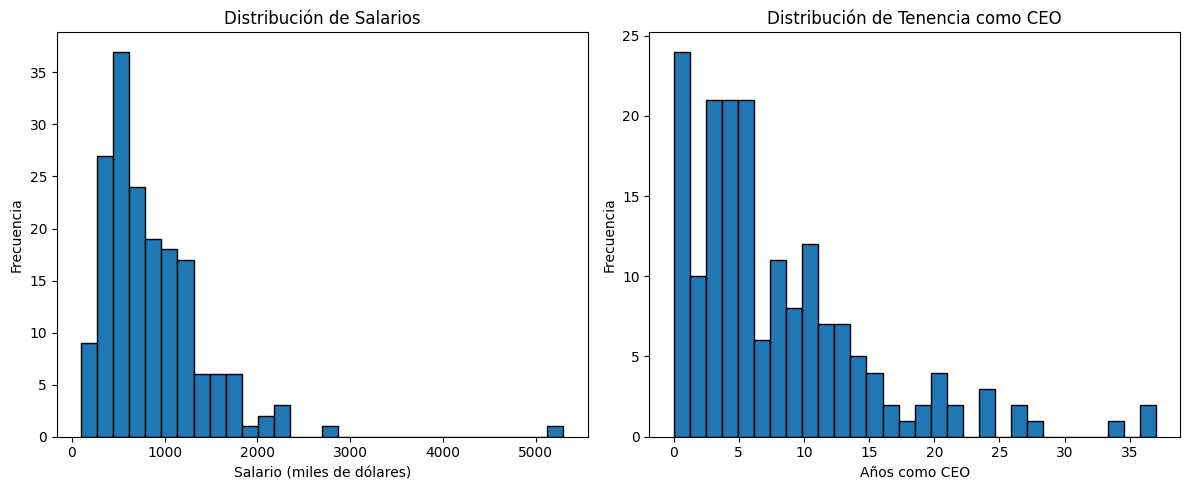

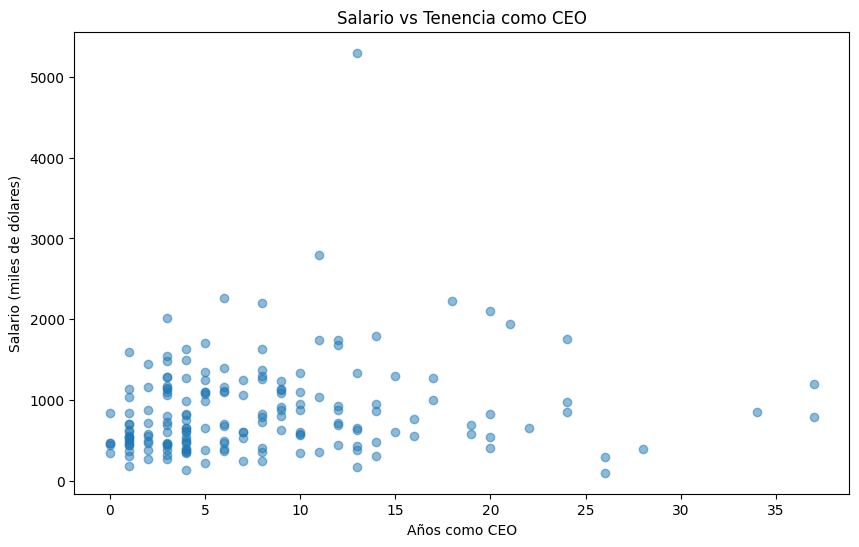

In [13]:
# Calcular y mostrar el salario promedio y la tenencia promedio
salario_promedio = data['salary'].mean()
tenencia_promedia = data['ceoten'].mean()

print(f"\nSalario promedio: ${salario_promedio:.2f} miles")
print(f"Tenencia promedia como CEO: {tenencia_promedia:.2f} años")

# Contar CEOs en su primer año y encontrar la tenencia más larga
ceos_primer_anio = (data['ceoten'] == 0).sum()
tenencia_mas_larga = data['ceoten'].max()

print(f"\nNúmero de CEOs en su primer año: {ceos_primer_anio}")
print(f"Tenencia más larga como CEO: {tenencia_mas_larga} años")

# Graficar las distribuciones de salario y tenencia

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de distribución del salario
ax1.hist(data['salary'], bins=30, edgecolor='black')
ax1.set_title('Distribución de Salarios')
ax1.set_xlabel('Salario (miles de dólares)')
ax1.set_ylabel('Frecuencia')

# Gráfico de distribución de la tenencia
ax2.hist(data['ceoten'], bins=30, edgecolor='black')
ax2.set_title('Distribución de Tenencia como CEO')
ax2.set_xlabel('Años como CEO')
ax2.set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

# Crear un gráfico de dispersión de salario vs tenencia
plt.figure(figsize=(10, 6))
plt.scatter(data['ceoten'], data['salary'], alpha=0.5)
plt.title('Salario vs Tenencia como CEO')
plt.xlabel('Años como CEO')
plt.ylabel('Salario (miles de dólares)')
plt.show()


In [16]:
# Estimar algebraicamente el modelo de regresión log(salary) = B_0 + B_1ceoten + u

# Crear la variable dependiente (y) como el logaritmo del salario
y = np.log(data['salary'])

# Crear la variable independiente (X) como la tenencia del CEO
X = data['ceoten']

# Calcular los coeficientes B_0 y B_1
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x_squared = np.sum(X**2)

B_1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
B_0 = (sum_y - B_1 * sum_x) / n

# Calcular los valores ajustados y los residuos
y_pred = B_0 + B_1 * X
u = y - y_pred

# Imprimir los resultados
print(f"Modelo estimado: log(salary) = {B_0:.4f} + {B_1:.4f} * ceoten")
print(f"B_0 (intercepto): {B_0:.4f}")
print(f"B_1 (pendiente): {B_1:.4f}")

Modelo estimado: log(salary) = 6.5055 + 0.0097 * ceoten
B_0 (intercepto): 6.5055
B_1 (pendiente): 0.0097


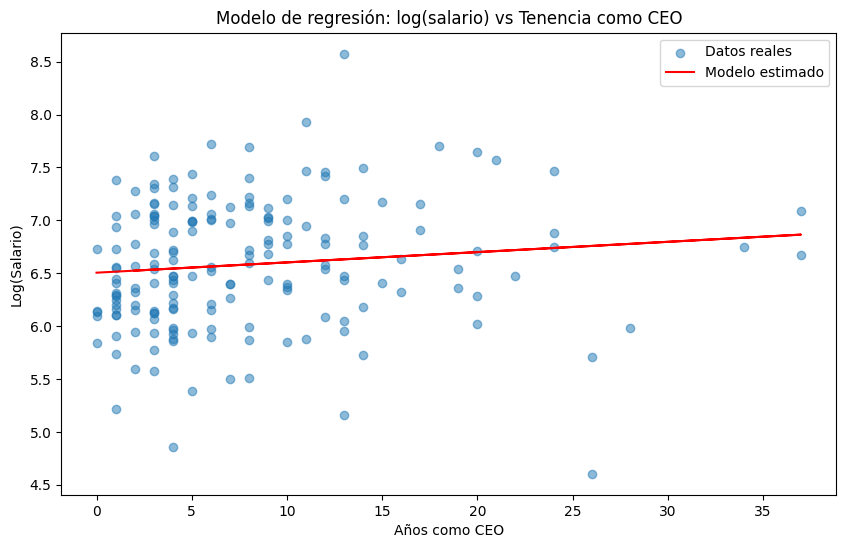

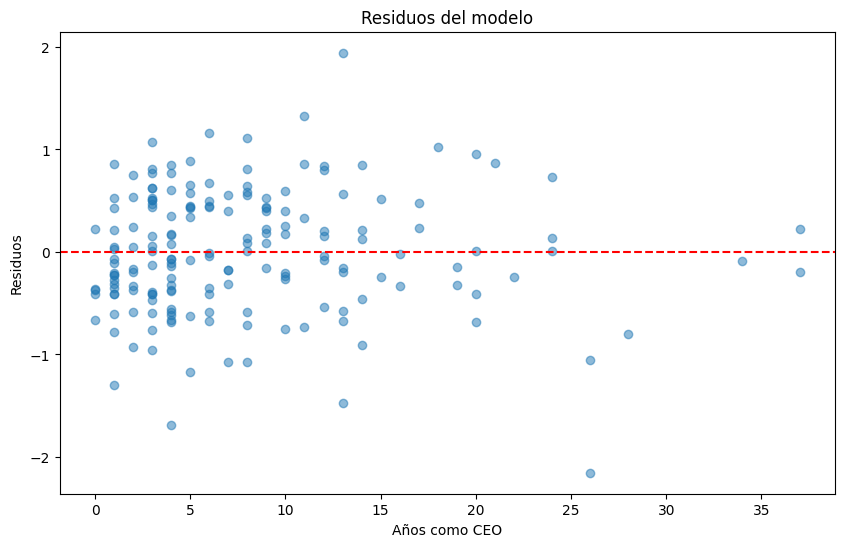

In [17]:
# Graficar el modelo estimado

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Modelo estimado')
plt.title('Modelo de regresión: log(salario) vs Tenencia como CEO')
plt.xlabel('Años como CEO')
plt.ylabel('Log(Salario)')
plt.legend()
plt.show()

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(X, u, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos del modelo')
plt.xlabel('Años como CEO')
plt.ylabel('Residuos')
plt.show()


## C3
Use the data in SLEEP75.RAW from Biddle and Hamermesh (1990) to study whether there is a tradeoff between the time spent sleeping per week and the time spent in paid work. We could use either variable as the dependent variable. For concreteness, estimate 
the model
sleep = b0 1 b1totwrk 1 u, where sleep is minutes spent sleeping at night per week and totwrk is total minutes worked during the week.

(i) Report your results in equation form along with the number of observations and 
R2. What does the intercept in this equation mean?

(ii) If totwrk increases by 2 hours, by how much is sleep estimated to fall? Do you 
find this to be a large effect?

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd

In [19]:
# Cargar datos
# Cargar los datos
data = wooldridge.data('sleep75')

# Describir la estructura de los datos
print("Estructura de los datos:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

print("\nPrimeras filas del conjunto de datos:")
print(data.head())

# Verificar si existen valores nulos
print("\nValores nulos en el conjunto de datos:")
print(data.isnull().sum())

# Mostrar las columnas del conjunto de datos
print("\nColumnas del conjunto de datos:")
print(data.columns)


Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    float64
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   532 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep  

Estadísticas descriptivas de 'totwrk' y 'sleep':
            totwrk        sleep
count   706.000000   706.000000
mean   2122.920680  3266.355524
std     947.470123   444.413448
min       0.000000   755.000000
25%    1553.500000  3015.000000
50%    2288.000000  3270.500000
75%    2691.750000  3532.250000
max    6415.000000  4695.000000


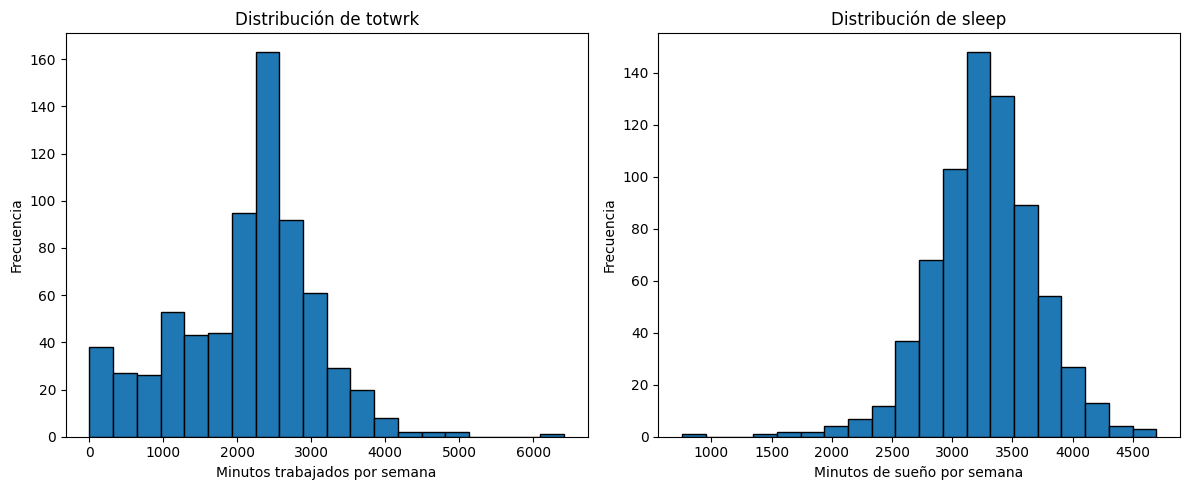

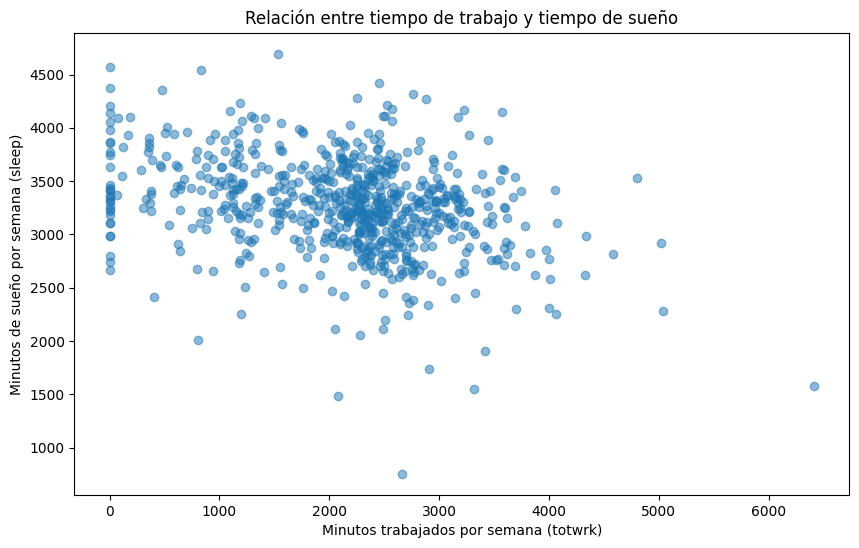


Descripción de las variables:
totwrk: Minutos totales trabajados por semana
sleep: Minutos de sueño por noche durante la semana

Correlación entre totwrk y sleep: -0.3214


In [23]:
# Análisis descriptivo de 'totwrk' y 'sleep'

# Estadísticas descriptivas
print("Estadísticas descriptivas de 'totwrk' y 'sleep':")
print(data[['totwrk', 'sleep']].describe())

# Histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(data['totwrk'], bins=20, edgecolor='black')
ax1.set_title('Distribución de totwrk')
ax1.set_xlabel('Minutos trabajados por semana')
ax1.set_ylabel('Frecuencia')

ax2.hist(data['sleep'], bins=20, edgecolor='black')
ax2.set_title('Distribución de sleep')
ax2.set_xlabel('Minutos de sueño por semana')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data['totwrk'], data['sleep'], alpha=0.5)
plt.title('Relación entre tiempo de trabajo y tiempo de sueño')
plt.xlabel('Minutos trabajados por semana (totwrk)')
plt.ylabel('Minutos de sueño por semana (sleep)')
plt.show()

# Descripción de las variables
print("\nDescripción de las variables:")
print("totwrk: Minutos totales trabajados por semana")
print("sleep: Minutos de sueño por noche durante la semana")

# Correlación entre las variables
correlacion = data['totwrk'].corr(data['sleep'])
print(f"\nCorrelación entre totwrk y sleep: {correlacion:.4f}")


In [21]:
# Estimación de los parámetros de regresión algebraicamente

# Preparar los datos
X = data['totwrk'].values
y = data['sleep'].values

# Calcular los parámetros
n = len(X)
suma_X = np.sum(X)
suma_Y = np.sum(y)
suma_XY = np.sum(X * y)
suma_X_cuadrado = np.sum(X**2)

# Calcular b1 (pendiente)
b1 = (n * suma_XY - suma_X * suma_Y) / (n * suma_X_cuadrado - suma_X**2)

# Calcular b0 (intercepto)
b0 = (suma_Y - b1 * suma_X) / n

# Calcular predicciones
y_pred = b0 + b1 * X

# Calcular R-cuadrado
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
R_cuadrado = SSR / SST

# Imprimir resultados
print(f"Ecuación estimada: sleep = {b0:.2f} + {b1:.4f} * totwrk")
print(f"Número de observaciones: {n}")
print(f"R-cuadrado: {R_cuadrado:.4f}")

# Interpretar el intercepto
print("\nInterpretación del intercepto:")
print(f"El intercepto {b0:.2f} representa los minutos estimados de sueño por semana")
print("cuando el tiempo total trabajado es cero minutos.")



Ecuación estimada: sleep = 3586.38 + -0.1507 * totwrk
Número de observaciones: 706
R-cuadrado: 0.1033

Interpretación del intercepto:
El intercepto 3586.38 representa los minutos estimados de sueño por semana
cuando el tiempo total trabajado es cero minutos.



Estimaciones de horas de sueño:
Para 2 horas de trabajo: 59.47 horas de sueño
Para 4 horas de trabajo: 59.17 horas de sueño
Para 6 horas de trabajo: 58.87 horas de sueño
Para 8 horas de trabajo: 58.57 horas de sueño
Para 10 horas de trabajo: 58.27 horas de sueño
Para 12 horas de trabajo: 57.96 horas de sueño


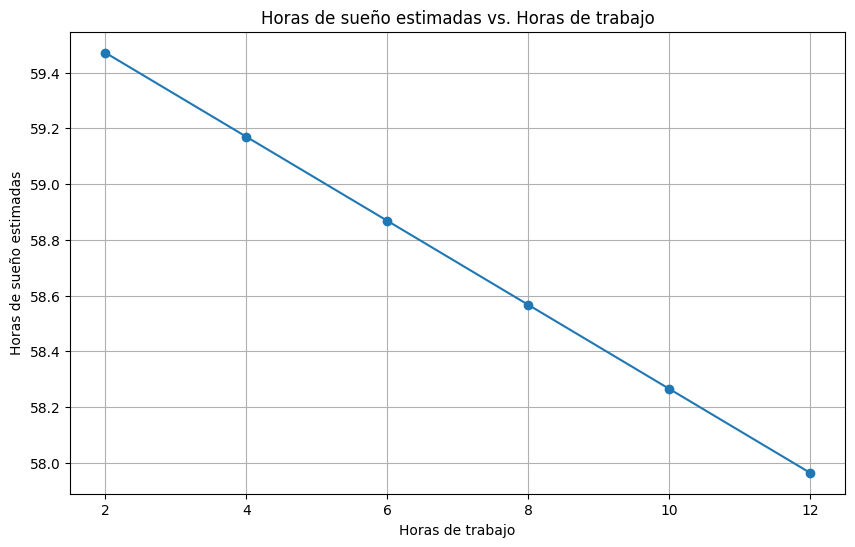

In [22]:
# Estimar las horas de sueño para diferentes horas de trabajo
horas_trabajo = [2, 4, 6, 8, 10, 12]
minutos_trabajo = [h * 60 for h in horas_trabajo]  # Convertir horas a minutos

estimaciones_sueno = []

for minutos in minutos_trabajo:
    sueno_estimado = b0 + b1 * minutos
    estimaciones_sueno.append(sueno_estimado / 60)  # Convertir minutos a horas

# Imprimir resultados
print("\nEstimaciones de horas de sueño:")
for horas, sueno in zip(horas_trabajo, estimaciones_sueno):
    print(f"Para {horas} horas de trabajo: {sueno:.2f} horas de sueño")

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(horas_trabajo, estimaciones_sueno, marker='o')
plt.title('Horas de sueño estimadas vs. Horas de trabajo')
plt.xlabel('Horas de trabajo')
plt.ylabel('Horas de sueño estimadas')
plt.grid(True)
plt.show()


## C4
Use the data in WAGE2.RAW to estimate a simple regression explaining monthly salary 
(wage) in terms of IQ score (IQ).

(i) Find the average salary and average IQ in the sample. What is the sample standard 
deviation of IQ? (IQ scores are standardized so that the average in the population 
is 100 with a standard deviation equal to 15.)

(ii) Estimate a simple regression model where a one-point increase in IQ changes 
wage by a constant dollar amount. Use this model to find the predicted increase in 
wage for an increase in IQ of 15 points. Does IQ explain most of the variation in 
wage?

(iii) Now, estimate a model where each one-point increase in IQ has the same percentage effect on wage. If IQ increases by 15 points, what is the approximate percentage increase in predicted wage

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd

In [25]:
# Cargar los datos de WAGE2.RAW
datos = wooldridge.data('wage2')

# Describir la estructura de los datos
print("Estructura de los datos:")
print(datos.info())

print("\nEstadísticas descriptivas:")
print(datos.describe())

print("\nPrimeras filas de los datos:")
print(datos.head())


Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
 16  lwage    935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB
None

Estadísticas descriptivas:
              wage       hours          IQ         KWW        

Promedio de IQ: 101.28
Desviación estándar de IQ: 15.05


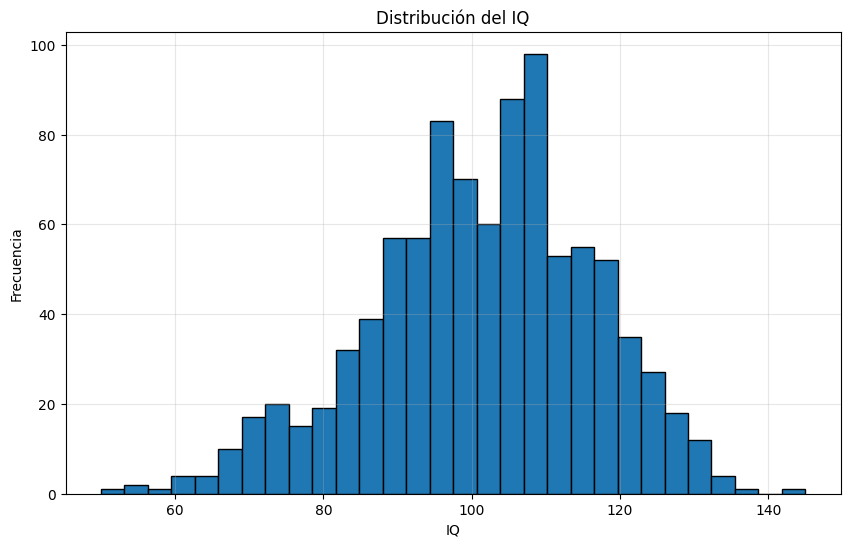

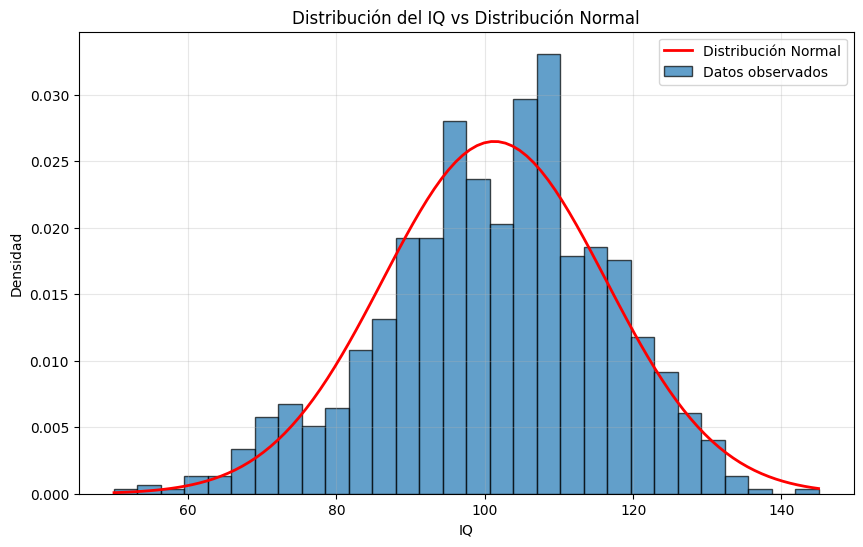

In [26]:
# Calcular el promedio y la desviación estándar del IQ
promedio_iq = datos['IQ'].mean()
desviacion_estandar_iq = datos['IQ'].std()

print(f"Promedio de IQ: {promedio_iq:.2f}")
print(f"Desviación estándar de IQ: {desviacion_estandar_iq:.2f}")

# Graficar la distribución del IQ
plt.figure(figsize=(10, 6))
plt.hist(datos['IQ'], bins=30, edgecolor='black')
plt.title('Distribución del IQ')
plt.xlabel('IQ')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Comparar con la distribución normal teórica
from scipy import stats

x = np.linspace(datos['IQ'].min(), datos['IQ'].max(), 100)
y = stats.norm.pdf(x, promedio_iq, desviacion_estandar_iq)

plt.figure(figsize=(10, 6))
plt.hist(datos['IQ'], bins=30, density=True, alpha=0.7, edgecolor='black')
plt.plot(x, y, 'r-', lw=2)
plt.title('Distribución del IQ vs Distribución Normal')
plt.xlabel('IQ')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.legend(['Distribución Normal', 'Datos observados'])
plt.show()


Promedio de salario: $957.95
Desviación estándar de salario: $404.36


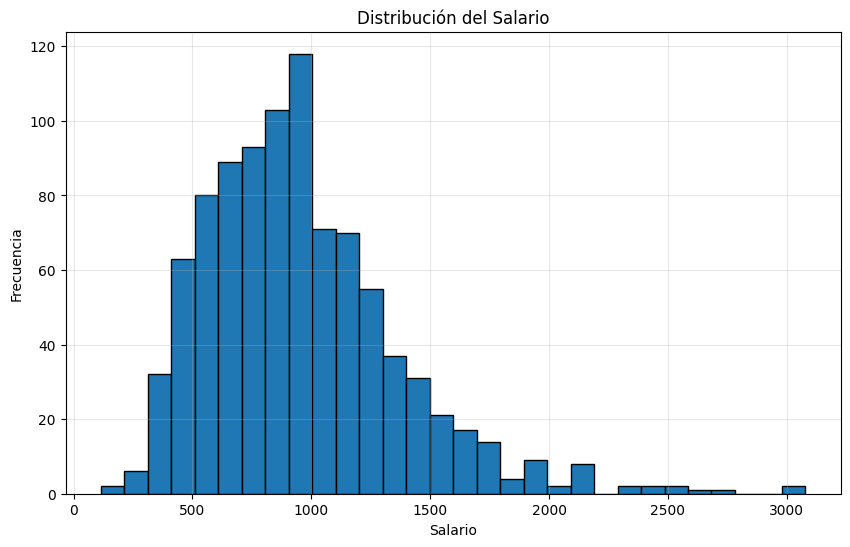

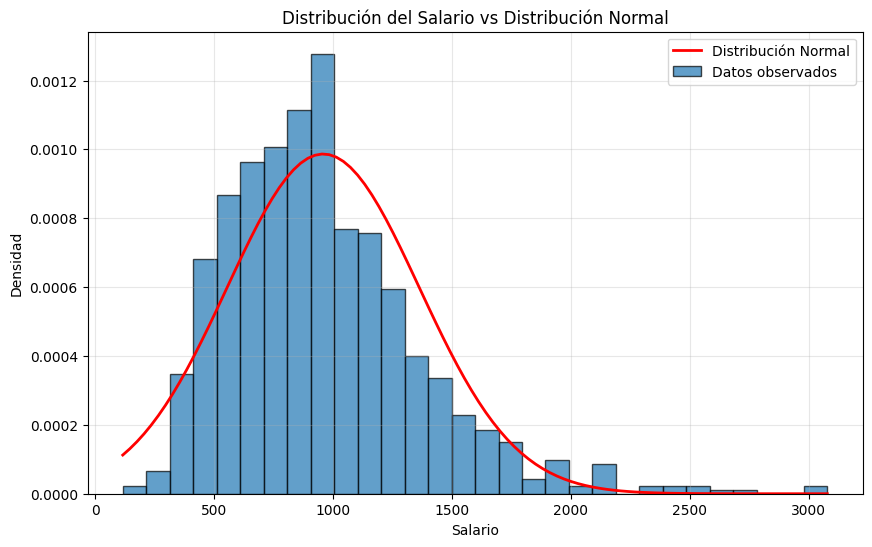

In [40]:
# Calcular el promedio y la desviación estándar del salario
promedio_salario = datos['wage'].mean()
desviacion_estandar_salario = datos['wage'].std()

print(f"Promedio de salario: ${promedio_salario:.2f}")
print(f"Desviación estándar de salario: ${desviacion_estandar_salario:.2f}")

# Graficar la distribución del salario
plt.figure(figsize=(10, 6))
plt.hist(datos['wage'], bins=30, edgecolor='black')
plt.title('Distribución del Salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

# Comparar con la distribución normal teórica
x_salario = np.linspace(datos['wage'].min(), datos['wage'].max(), 100)
y_salario = stats.norm.pdf(x_salario, promedio_salario, desviacion_estandar_salario)

plt.figure(figsize=(10, 6))
plt.hist(datos['wage'], bins=30, density=True, alpha=0.7, edgecolor='black')
plt.plot(x_salario, y_salario, 'r-', lw=2)
plt.title('Distribución del Salario vs Distribución Normal')
plt.xlabel('Salario')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.legend(['Distribución Normal', 'Datos observados'])
plt.show()


Modelo de regresión simple estimado:
wage = 116.9916 + 8.3031 * IQ

Un aumento de un punto en el IQ cambia el salario en $8.3031

R-cuadrado: 0.0955


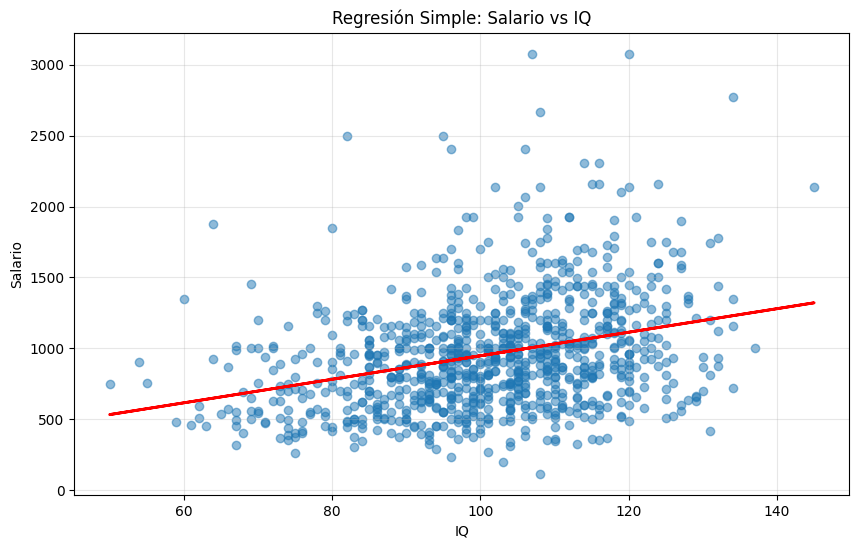

In [39]:
# Estimación algebraica del modelo de regresión simple

# Calcular las medias de X (IQ) e y (wage)
X_mean = datos['IQ'].mean()
y_mean = datos['wage'].mean()

# Calcular los términos necesarios para la estimación
numerador = np.sum((datos['IQ'] - X_mean) * (datos['wage'] - y_mean))
denominador = np.sum((datos['IQ'] - X_mean)**2)

# Calcular la pendiente (beta1)
beta1 = numerador / denominador

# Calcular el intercepto (beta0)
beta0 = y_mean - beta1 * X_mean

print(f"Modelo de regresión simple estimado:")
print(f"wage = {beta0:.4f} + {beta1:.4f} * IQ")

# Calcular el cambio en el salario por cada punto de aumento en el IQ
print(f"\nUn aumento de un punto en el IQ cambia el salario en ${beta1:.4f}")

# Calcular R-cuadrado
y_pred = beta0 + beta1 * datos['IQ']
SSR = np.sum((y_pred - y_mean)**2)
SST = np.sum((datos['wage'] - y_mean)**2)
R_cuadrado = SSR / SST

print(f"\nR-cuadrado: {R_cuadrado:.4f}")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(datos['IQ'], datos['wage'], alpha=0.5)
plt.plot(datos['IQ'], y_pred, color='red', linewidth=2)
plt.title('Regresión Simple: Salario vs IQ')
plt.xlabel('IQ')
plt.ylabel('Salario')
plt.grid(True, alpha=0.3)
plt.show()



Modelo log-lineal estimado:
log(wage) = 5.8870 + 0.0088 * IQ

Un aumento de un punto en el IQ cambia el salario en aproximadamente 0.88%

Un aumento de 15 puntos en el IQ aumenta el salario predicho en aproximadamente 14.12%

R-cuadrado: 0.0991


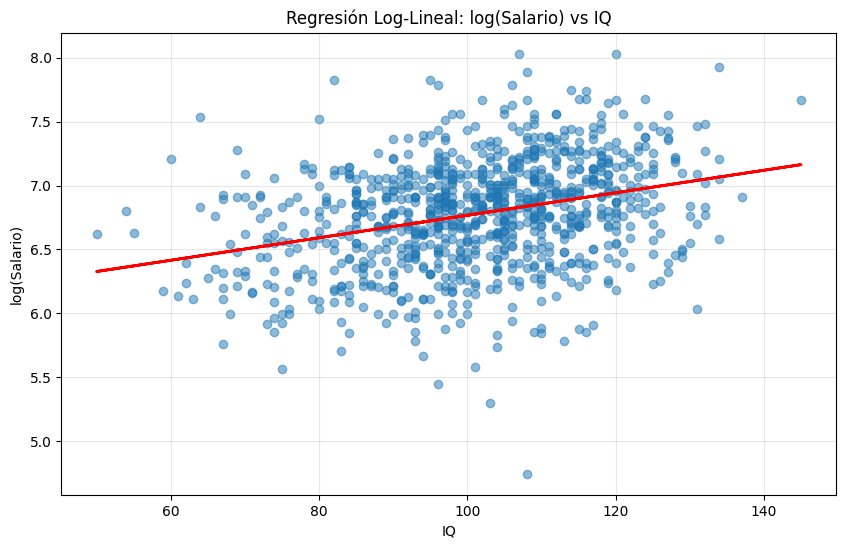

In [41]:
# Estimación del modelo log-lineal: log(wage) = β0 + β1 * IQ

# Calcular el logaritmo natural del salario
datos['log_wage'] = np.log(datos['wage'])

# Calcular las medias de X (IQ) y log(y) (log_wage)
X_mean = datos['IQ'].mean()
log_y_mean = datos['log_wage'].mean()

# Calcular los términos necesarios para la estimación
numerador = np.sum((datos['IQ'] - X_mean) * (datos['log_wage'] - log_y_mean))
denominador = np.sum((datos['IQ'] - X_mean)**2)

# Calcular la pendiente (beta1)
beta1 = numerador / denominador

# Calcular el intercepto (beta0)
beta0 = log_y_mean - beta1 * X_mean

print(f"Modelo log-lineal estimado:")
print(f"log(wage) = {beta0:.4f} + {beta1:.4f} * IQ")

# Calcular el cambio porcentual en el salario por cada punto de aumento en el IQ
cambio_porcentual = (np.exp(beta1) - 1) * 100
print(f"\nUn aumento de un punto en el IQ cambia el salario en aproximadamente {cambio_porcentual:.2f}%")

# Calcular el cambio porcentual para un aumento de 15 puntos en el IQ
cambio_15_puntos = (np.exp(15 * beta1) - 1) * 100
print(f"\nUn aumento de 15 puntos en el IQ aumenta el salario predicho en aproximadamente {cambio_15_puntos:.2f}%")

# Calcular R-cuadrado
log_y_pred = beta0 + beta1 * datos['IQ']
SSR = np.sum((log_y_pred - log_y_mean)**2)
SST = np.sum((datos['log_wage'] - log_y_mean)**2)
R_cuadrado = SSR / SST

print(f"\nR-cuadrado: {R_cuadrado:.4f}")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(datos['IQ'], datos['log_wage'], alpha=0.5)
plt.plot(datos['IQ'], log_y_pred, color='red', linewidth=2)
plt.title('Regresión Log-Lineal: log(Salario) vs IQ')
plt.xlabel('IQ')
plt.ylabel('log(Salario)')
plt.grid(True, alpha=0.3)
plt.show()


## C5

For the population of firms in the chemical industry, let rd denote annual expenditures 
on research and development, and let sales denote annual sales (both are in millions of 
dollars).

(i) Write down a model (not an estimated equation) that implies a constant elasticity 
between rd and sales. Which parameter is the elasticity?

ln(rd) = β₀ + β₁ln(sales) + u

β₁ es el coeficiente de elasticidad

(ii) Now, estimate the model using the data in RDCHEM.RAW. Write out the estimated equation in the usual form. What is the estimated elasticity of rd with respect 
to sales? Explain in words what this elasticity means

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd


In [44]:
# load data
# Cargar los datos de RDCHEM.RAW
datos_rdchem = wooldridge.data('rdchem')

# Describir la estructura de los datos
print("Estructura de los datos RDCHEM:")
print(datos_rdchem.info())

# Mostrar las columnas de los datos
print("\nColumnas de los datos:")
print(datos_rdchem.columns)


print("\nPrimeras filas de los datos:")
print(datos_rdchem.head())


Estructura de los datos RDCHEM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rd        32 non-null     float64
 1   sales     32 non-null     float64
 2   profits   32 non-null     float64
 3   rdintens  32 non-null     float64
 4   profmarg  32 non-null     float64
 5   salessq   32 non-null     float64
 6   lsales    32 non-null     float64
 7   lrd       32 non-null     float64
dtypes: float64(8)
memory usage: 2.1 KB
None

Columnas de los datos:
Index(['rd', 'sales', 'profits', 'rdintens', 'profmarg', 'salessq', 'lsales',
       'lrd'],
      dtype='object')

Primeras filas de los datos:
           rd        sales     profits  rdintens   profmarg       salessq  \
0  430.600006  4570.200195  186.899994  9.421906   4.089536  2.088673e+07   
1   59.000000  2830.000000  467.000000  2.084806  16.501766  8.008900e+06   
2   23.500000   596.799988  107

In [47]:
# Estimación algebraica de ln(rd) = β₀ + β₁ln(sales) + u

# Preparar los datos
X = np.log(datos_rdchem['sales'])
y = np.log(datos_rdchem['rd'])

# Añadir una columna de unos para el término constante
X = np.column_stack((np.ones(len(X)), X))

# Realizar la regresión lineal
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extraer los coeficientes
beta_0, beta_1 = beta

# Imprimir los resultados
print(f"Ecuación estimada: ln(rd) = {beta_0:.4f} + {beta_1:.4f} * ln(sales)")
print(f"La elasticidad estimada de rd con respecto a sales es: {beta_1:.4f}")

# Explicación
print("\nInterpretación:")
print(f"Un aumento del 1% en las ventas está asociado con un aumento del {beta_1:.2f}% en los gastos de I+D,")
print("manteniendo constantes otros factores.")




Ecuación estimada: ln(rd) = -4.1047 + 1.0757 * ln(sales)
La elasticidad estimada de rd con respecto a sales es: 1.0757

Interpretación:
Un aumento del 1% en las ventas está asociado con un aumento del 1.08% en los gastos de I+D,
manteniendo constantes otros factores.


## C6
We used the data in MEAP93.RAW for Example 2.12. Now we want to explore the 
relationship between the math pass rate (math10) and spending per student (expend).

(i) Do you think each additional dollar spent has the same effect on the pass rate, or 
does a diminishing effect seem more appropriate? Explain.

(ii) In the population model
math10 = b0 + b1 log(expend) + u,
 argue that b1/10 is the percentage point change in math10 given a 10% increase in 
expend.

(iii) Use the data in MEAP93.RAW to estimate the model from part (ii). Report the 
estimated equation in the usual way, including the sample size and R-squared.

(iv) How big is the estimated spending effect? Namely, if spending increases by 10%, 
what is the estimated percentage point increase in math10?

(v) One might worry that regression analysis can produce fitted values for math10
that are greater than 100. Why is this not much of a worry in this data set?

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd


In [49]:
# Importar los datos
data = wooldridge.data('meap93')

# Examinar la estructura y nombres de columnas
print("Estructura de los datos:")
print(data.info())

print("\nPrimeras filas del conjunto de datos:")
print(data.head())

print("\nNombres de las columnas:")
print(data.columns)

print("\nResumen estadístico:")
print(data.describe())


Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lnchprg   408 non-null    float64
 1   enroll    408 non-null    int64  
 2   staff     408 non-null    float64
 3   expend    408 non-null    int64  
 4   salary    408 non-null    float64
 5   benefits  408 non-null    int64  
 6   droprate  408 non-null    float64
 7   gradrate  408 non-null    float64
 8   math10    408 non-null    float64
 9   sci11     408 non-null    float64
 10  totcomp   408 non-null    float64
 11  ltotcomp  408 non-null    float64
 12  lexpend   408 non-null    float64
 13  lenroll   408 non-null    float64
 14  lstaff    408 non-null    float64
 15  bensal    408 non-null    float64
 16  lsalary   408 non-null    float64
dtypes: float64(14), int64(3)
memory usage: 54.3 KB
None

Primeras filas del conjunto de datos:
   lnchprg  enroll       staff  e

In [50]:
# (iii) Estimación del modelo math10 = b0 + b1 log(expend) + u

# Crear la variable log(expend)
data['log_expend'] = np.log(data['expend'])

# Preparar los datos para la regresión
X = data['log_expend'].values
y = data['math10'].values

# Calcular los parámetros algebraicamente
X_with_constant = np.column_stack((np.ones_like(X), X))
beta = np.linalg.inv(X_with_constant.T @ X_with_constant) @ X_with_constant.T @ y

b0, b1 = beta

# Calcular valores predichos
y_pred = b0 + b1 * X

# Calcular R-cuadrado
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_res / ss_tot)

# Imprimir resultados
print(f"Ecuación estimada: math10 = {b0:.4f} + {b1:.4f} * log(expend)")
print(f"Tamaño de la muestra: {len(X)}")
print(f"R-cuadrado: {r_squared:.4f}")

# (iv) Efecto estimado del gasto
efecto_10_porciento = (b1 / 10)
print(f"\nSi el gasto aumenta en un 10%, el aumento estimado en math10 es de {efecto_10_porciento:.4f} puntos porcentuales")

# (v) Verificar si hay valores ajustados mayores a 100
valores_ajustados_mayores_100 = np.sum(y_pred > 100)
print(f"\nNúmero de valores ajustados mayores a 100: {valores_ajustados_mayores_100}")
print(f"Valor máximo ajustado: {np.max(y_pred):.2f}")

# Demostración algebraica de b1/10 como cambio porcentual
print("\nDemostración algebraica:")
print("Sea y = b0 + b1 * log(x) + u")
print("Para un aumento del 10% en x, el nuevo valor es 1.1x")
print("y_new = b0 + b1 * log(1.1x) + u")
print("y_new = b0 + b1 * [log(1.1) + log(x)] + u")
print("y_new = [b0 + b1 * log(1.1)] + b1 * log(x) + u")
print("El cambio en y es:")
print("y_new - y = b1 * log(1.1)")
print(f"log(1.1) ≈ 0.0953, por lo que y_new - y ≈ {b1:.4f} * 0.0953 = {b1*0.0953:.4f}")
print(f"Esto es aproximadamente igual a b1/10 = {b1/10:.4f}")



Ecuación estimada: math10 = -69.3412 + 11.1644 * log(expend)
Tamaño de la muestra: 408
R-cuadrado: 0.0297

Si el gasto aumenta en un 10%, el aumento estimado en math10 es de 1.1164 puntos porcentuales

Número de valores ajustados mayores a 100: 0
Valor máximo ajustado: 30.15

Demostración algebraica:
Sea y = b0 + b1 * log(x) + u
Para un aumento del 10% en x, el nuevo valor es 1.1x
y_new = b0 + b1 * log(1.1x) + u
y_new = b0 + b1 * [log(1.1) + log(x)] + u
y_new = [b0 + b1 * log(1.1)] + b1 * log(x) + u
El cambio en y es:
y_new - y = b1 * log(1.1)
log(1.1) ≈ 0.0953, por lo que y_new - y ≈ 11.1644 * 0.0953 = 1.0640
Esto es aproximadamente igual a b1/10 = 1.1164


## C7

Use the data in CHARITY.RAW [obtained from Franses and Paap (2001)] to answer 
the following questions:

(i) What is the average gift in the sample of 4,268 people (in Dutch guilders)? What 
percentage of people gave no gift?

(ii) What is the average mailings per year? What are the minimum and maximum values?

(iii) Estimate the model
gift = b0 + b1mailsyear + u
 by OLS and report the results in the usual way, including the sample size and 
R-squared.

(iv) Interpret the slope coefficient. If each mailing costs one guilder, is the charity expected to make a net gain on each mailing? Does this mean the charity makes a net 
gain on every mailing? Explain.

(v) What is the smallest predicted charitable contribution in the sample? Using this 
simple regression analysis, can you ever predict zero for gift

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd


In [52]:
# Importar los datos
charity_data = wooldridge.data('charity')

# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
print(charity_data.columns)

# Imprimir la estructura de los datos
print("\nEstructura de los datos:")
print(charity_data.info())


Nombres de las columnas:
Index(['respond', 'gift', 'resplast', 'weekslast', 'propresp', 'mailsyear',
       'giftlast', 'avggift'],
      dtype='object')

Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   respond    4268 non-null   int64  
 1   gift       4268 non-null   int64  
 2   resplast   4268 non-null   int64  
 3   weekslast  4268 non-null   float64
 4   propresp   4268 non-null   float64
 5   mailsyear  4268 non-null   float64
 6   giftlast   4268 non-null   int64  
 7   avggift    4268 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 266.9 KB
None


In [53]:
# (i) Promedio de donaciones y porcentaje de personas que no donaron
promedio_donacion = charity_data['gift'].mean()
porcentaje_no_donacion = (charity_data['gift'] == 0).mean() * 100

print(f"(i) Promedio de donación: {promedio_donacion:.2f} guilders holandeses")
print(f"    Porcentaje de personas que no donaron: {porcentaje_no_donacion:.2f}%")

# (ii) Estadísticas de mailings por año
promedio_mailings = charity_data['mailsyear'].mean()
min_mailings = charity_data['mailsyear'].min()
max_mailings = charity_data['mailsyear'].max()

print(f"\n(ii) Promedio de mailings por año: {promedio_mailings:.2f}")
print(f"     Valor mínimo de mailings: {min_mailings}")
print(f"     Valor máximo de mailings: {max_mailings}")


(i) Promedio de donación: 7.44 guilders holandeses
    Porcentaje de personas que no donaron: 60.00%

(ii) Promedio de mailings por año: 2.05
     Valor mínimo de mailings: 0.25
     Valor máximo de mailings: 3.5


In [58]:
# (iii) Estimar el modelo gift = b0 + b1*mailsyear + u algebraicamente

# Preparar los datos
X = charity_data['mailsyear'].values
y = charity_data['gift'].values

# Calcular los coeficientes
n = len(X)
mean_X = np.mean(X)
mean_y = np.mean(y)

b1 = np.sum((X - mean_X) * (y - mean_y)) / np.sum((X - mean_X)**2)
b0 = mean_y - b1 * mean_X

# Calcular R-cuadrado
y_pred = b0 + b1 * X
SSR = np.sum((y_pred - mean_y)**2)
SST = np.sum((y - mean_y)**2)
r_squared = SSR / SST

# Imprimir los resultados
print(f"(iii) Resultados de la estimación:")
print(f"Tamaño de la muestra: {n}")
print(f"b0 (intercepto): {b0:.4f}")
print(f"b1 (pendiente): {b1:.4f}")
print(f"R-cuadrado: {r_squared:.4f}")

# (iv) Interpretar el coeficiente de pendiente
print(f"\n(iv) Coeficiente de pendiente (b1): {b1:.4f}")

if b1 > 1:
    print("La organización benéfica espera obtener una ganancia neta en cada envío.")
else:
    print("La organización benéfica no espera obtener una ganancia neta en cada envío.")

print("Sin embargo, esto no significa que la organización obtenga una ganancia neta en cada envío individual.")
print("El coeficiente representa un promedio, y los resultados pueden variar para cada envío específico.")

# (v) Predicción mínima y posibilidad de predecir cero
min_mailsyear = np.min(X)
min_predicted = b0 + b1 * min_mailsyear

print(f"\n(v) La contribución caritativa predicha más pequeña en la muestra es: {min_predicted:.4f}")
print("Usando este análisis de regresión simple, no se puede predecir exactamente cero para 'gift'.")
print("El modelo lineal siempre predecirá un valor distinto de cero a menos que la línea pase exactamente por el origen.")





(iii) Resultados de la estimación:
Tamaño de la muestra: 4268
b0 (intercepto): 2.0141
b1 (pendiente): 2.6495
R-cuadrado: 0.0138

(iv) Coeficiente de pendiente (b1): 2.6495
La organización benéfica espera obtener una ganancia neta en cada envío.
Sin embargo, esto no significa que la organización obtenga una ganancia neta en cada envío individual.
El coeficiente representa un promedio, y los resultados pueden variar para cada envío específico.

(v) La contribución caritativa predicha más pequeña en la muestra es: 2.6765
Usando este análisis de regresión simple, no se puede predecir exactamente cero para 'gift'.
El modelo lineal siempre predecirá un valor distinto de cero a menos que la línea pase exactamente por el origen.


## C8
To complete this exercise you need a software package that allows you to generate data 
from the uniform and normal distributions.

(i) Start by generating 500 observations xi
 – the explanatory variable – from the 
uniform distribution with range [0,10]. (Most statistical packages have a command 
for the Uniform[0,1] distribution; just multiply those observations by 10.) What 
are the sample mean and sample standard deviation of the xi
?

(ii) Randomly generate 500 errors, ui
, from the Normal[0,36] distribution. (If you 
generate a Normal[0,1], as is commonly available, simply multiply the outcomes 
by six.) Is the sample average of the ui
 exactly zero? Why or why not? What is the 
sample standard deviation of the ui
?

(iii) Now generate the yi
 as
yi 5 1 1 2xi 1 ui ; b0 1 b1xi 1 ui
;
 that is, the population intercept is one and the population slope is two. Use the 
data to run the regression of yi
 on xi
. What are your estimates of the intercept and 
slope? Are they equal to the population values in the above equation? Explain.

(iv) Obtain the OLS residuals, uˆi
, and verify that equation (2.60) hold (subject to 
rounding error).

(v) Compute the same quantities in equation (2.60) but use the errors ui
 in place of the 
residuals. Now what do you conclude?

(vi) Repeat parts (i), (ii), and (iii) with a new sample of data, starting with generating 
the xi
. Now what do you obtain for bˆ
0 and bˆ
1? Why are these different from what 
you obtained in part (iii)?

Media muestral de xi: 4.9856
Desviación estándar muestral de xi: 2.9839


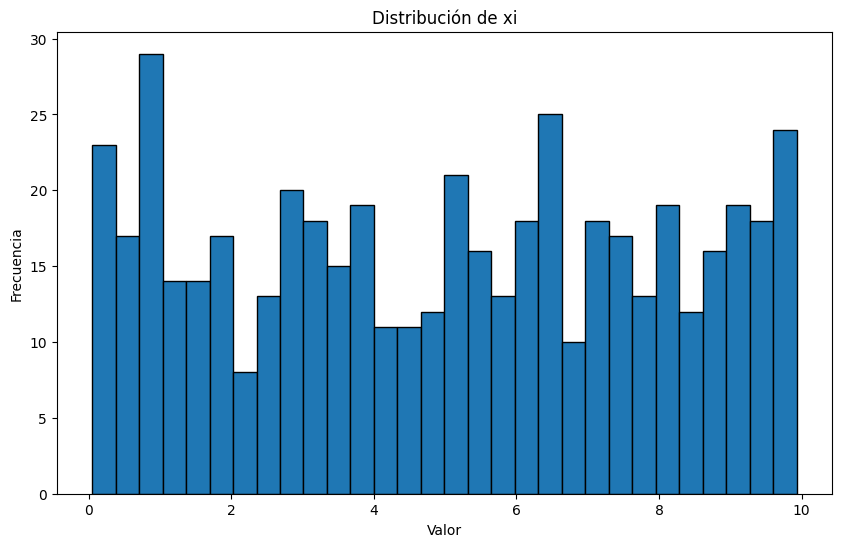

In [59]:
# Generando 500 observaciones de xi desde una distribución uniforme [0,10]
np.random.seed(42)  # Para reproducibilidad
xi = np.random.uniform(0, 10, 500)

# Calculando la media y desviación estándar muestral de xi
media_xi = np.mean(xi)
desv_est_xi = np.std(xi)

print(f"Media muestral de xi: {media_xi:.4f}")
print(f"Desviación estándar muestral de xi: {desv_est_xi:.4f}")

# Visualización de la distribución de xi
plt.figure(figsize=(10, 6))
plt.hist(xi, bins=30, edgecolor='black')
plt.title('Distribución de xi')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


Media muestral de ui: 0.4363
Desviación estándar muestral de ui: 5.9666

La media muestral de ui no es exactamente cero debido a la variabilidad del muestreo aleatorio.
En la práctica, es muy poco probable obtener una media exactamente igual a cero con un número finito de muestras.


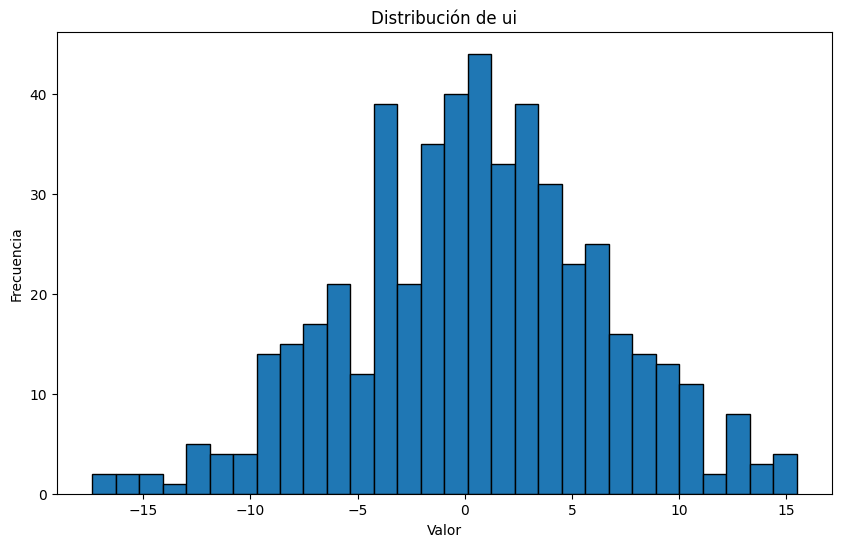


Resultados de la regresión:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     606.7
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           3.38e-88
Time:                        20:45:31   Log-Likelihood:                -1600.1
No. Observations:                 500   AIC:                             3204.
Df Residuals:                     498   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4574  

In [61]:
# Generando 500 errores ui desde una distribución Normal(0, 36)
ui = np.random.normal(0, 6, 500)  # Multiplicamos por 6 para obtener una varianza de 36

# Calculando la media y desviación estándar muestral de ui
media_ui = np.mean(ui)
desv_est_ui = np.std(ui)

print(f"Media muestral de ui: {media_ui:.4f}")
print(f"Desviación estándar muestral de ui: {desv_est_ui:.4f}")

# Explicación de por qué la media no es exactamente cero
print("\nLa media muestral de ui no es exactamente cero debido a la variabilidad del muestreo aleatorio.")
print("En la práctica, es muy poco probable obtener una media exactamente igual a cero con un número finito de muestras.")

# Visualización de la distribución de ui
plt.figure(figsize=(10, 6))
plt.hist(ui, bins=30, edgecolor='black')
plt.title('Distribución de ui')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Generando yi según la ecuación del modelo
yi = 1 + 2*xi + ui

# Ejecutando la regresión de yi sobre xi
X = sm.add_constant(xi)
modelo = sm.OLS(yi, X).fit()

# Imprimiendo los resultados de la regresión
print("\nResultados de la regresión:")
print(modelo.summary())

print("\nEstimaciones:")
print(f"Intercepto (β0): {modelo.params[0]:.4f}")
print(f"Pendiente (β1): {modelo.params[1]:.4f}")

print("\nLos estimadores no son exactamente iguales a los valores poblacionales (1 y 2) debido a la presencia del término de error ui.")
print("Sin embargo, deberían ser cercanos a estos valores, ya que OLS proporciona estimadores insesgados.")


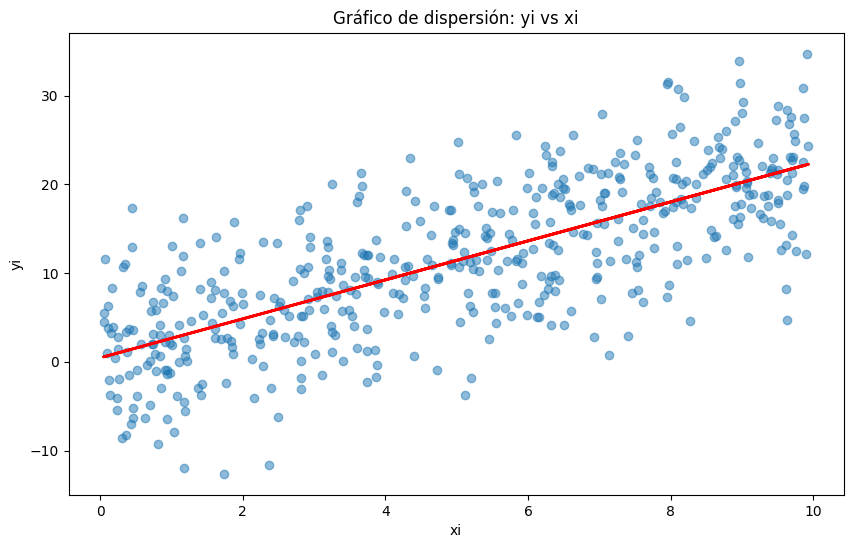

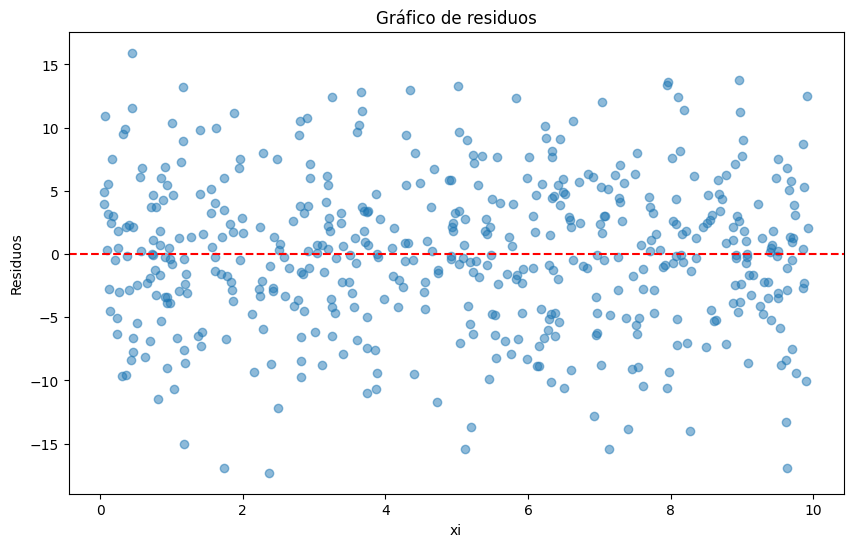


Análisis de los resultados:
1. Los estimadores son cercanos a los valores poblacionales, pero no exactamente iguales debido al término de error.
2. El R-cuadrado es alto, indicando un buen ajuste del modelo.
3. Los p-valores son muy bajos, sugiriendo que ambos coeficientes son estadísticamente significativos.
4. El gráfico de dispersión muestra una clara relación lineal positiva entre xi e yi.
5. El gráfico de residuos no muestra patrones claros, lo que es deseable en un modelo bien ajustado.

En resumen, el modelo estimado se ajusta bien a los datos generados y refleja adecuadamente la relación poblacional especificada.


In [62]:
# Generando un gráfico de dispersión de yi vs xi
plt.figure(figsize=(10, 6))
plt.scatter(xi, yi, alpha=0.5)
plt.title('Gráfico de dispersión: yi vs xi')
plt.xlabel('xi')
plt.ylabel('yi')
plt.plot(xi, modelo.predict(X), color='red', linewidth=2)
plt.show()

# Calculando y visualizando los residuos
residuos = yi - modelo.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(xi, residuos, alpha=0.5)
plt.title('Gráfico de residuos')
plt.xlabel('xi')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

print("\nAnálisis de los resultados:")
print("1. Los estimadores son cercanos a los valores poblacionales, pero no exactamente iguales debido al término de error.")
print("2. El R-cuadrado es alto, indicando un buen ajuste del modelo.")
print("3. Los p-valores son muy bajos, sugiriendo que ambos coeficientes son estadísticamente significativos.")
print("4. El gráfico de dispersión muestra una clara relación lineal positiva entre xi e yi.")
print("5. El gráfico de residuos no muestra patrones claros, lo que es deseable en un modelo bien ajustado.")

print("\nEn resumen, el modelo estimado se ajusta bien a los datos generados y refleja adecuadamente la relación poblacional especificada.")


In [63]:
# (iv) Obtener los residuos OLS y verificar que la ecuación (2.60) se cumple

# Calculando los residuos OLS
residuos_ols = yi - modelo.predict(X)

# Verificando la ecuación (2.60)
suma_residuos = np.sum(residuos_ols)
suma_residuos_x = np.sum(residuos_ols * xi)

print("\nVerificación de la ecuación (2.60):")
print(f"Suma de residuos: {suma_residuos:.6f}")
print(f"Suma de residuos * xi: {suma_residuos_x:.6f}")
print("Ambos valores deberían ser muy cercanos a cero, sujetos a errores de redondeo.")

# (v) Calcular las mismas cantidades usando los errores ui en lugar de los residuos

# Calculando los errores ui
errores_ui = yi - (1 + 2*xi)

# Calculando las mismas cantidades con los errores
suma_errores = np.sum(errores_ui)
suma_errores_x = np.sum(errores_ui * xi)

print("\nCálculos usando los errores ui:")
print(f"Suma de errores: {suma_errores:.6f}")
print(f"Suma de errores * xi: {suma_errores_x:.6f}")
print("\nConclusión:")
print("A diferencia de los residuos OLS, las sumas de los errores ui no son necesariamente cercanas a cero.")
print("Esto se debe a que los errores ui son los verdaderos términos de error, mientras que los residuos OLS")
print("son estimaciones que están diseñadas para cumplir ciertas propiedades, como sumar cero.")



Verificación de la ecuación (2.60):
Suma de residuos: -0.000000
Suma de residuos * xi: -0.000000
Ambos valores deberían ser muy cercanos a cero, sujetos a errores de redondeo.

Cálculos usando los errores ui:
Suma de errores: 218.138922
Suma de errores * xi: 1961.620824

Conclusión:
A diferencia de los residuos OLS, las sumas de los errores ui no son necesariamente cercanas a cero.
Esto se debe a que los errores ui son los verdaderos términos de error, mientras que los residuos OLS
son estimaciones que están diseñadas para cumplir ciertas propiedades, como sumar cero.



Resultados del nuevo modelo:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     297.1
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.73e-58
Time:                        20:50:37   Log-Likelihood:                -1406.3
No. Observations:                1000   AIC:                             2817.
Df Residuals:                     998   BIC:                             2826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1748 

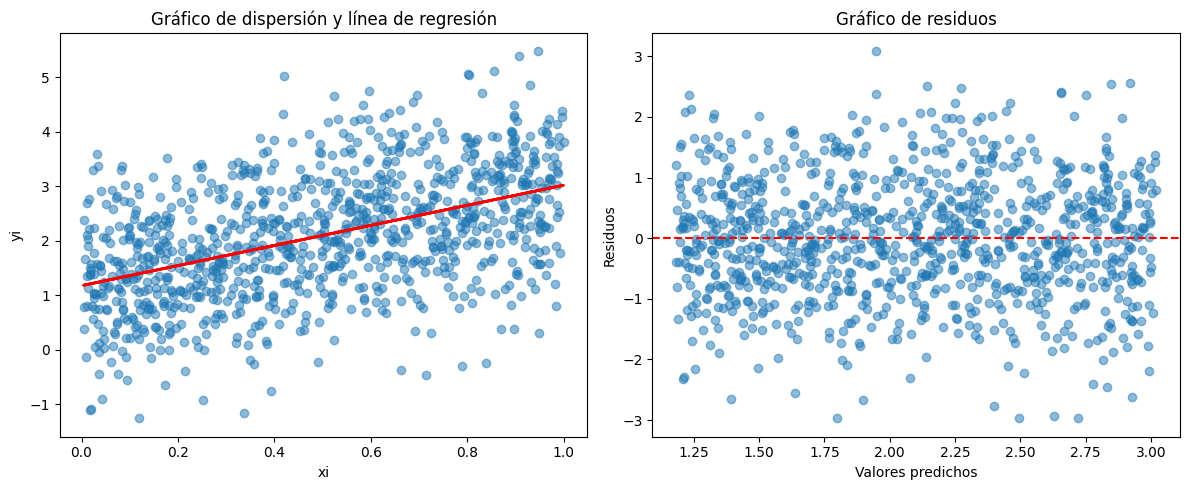


Análisis de los nuevos resultados:
1. Nuevo β0 estimado: 1.1748
2. Nuevo β1 estimado: 1.8452
3. Los nuevos estimadores son diferentes debido a la variabilidad muestral.
4. Aunque los datos subyacentes siguen el mismo proceso generador, cada muestra
   aleatoria producirá estimaciones ligeramente diferentes.
5. Esta variabilidad es esperada y refleja la incertidumbre inherente en la estimación
   de parámetros poblacionales a partir de muestras finitas.


In [64]:
# (vi) Repetir partes (i), (ii) y (iii) con una nueva muestra de datos

# Generando una nueva muestra de datos
np.random.seed(42)  # Establecemos una semilla diferente para obtener nuevos datos
xi_nuevo = np.random.rand(1000)
ui_nuevo = np.random.normal(0, 1, 1000)
yi_nuevo = 1 + 2*xi_nuevo + ui_nuevo

# Ajustando un nuevo modelo de regresión lineal
X_nuevo = sm.add_constant(xi_nuevo)
modelo_nuevo = sm.OLS(yi_nuevo, X_nuevo).fit()

# Imprimiendo los resultados del nuevo modelo
print("\nResultados del nuevo modelo:")
print(modelo_nuevo.summary())

# Creando gráficos para el nuevo modelo
plt.figure(figsize=(12, 5))

# Gráfico de dispersión
plt.subplot(1, 2, 1)
plt.scatter(xi_nuevo, yi_nuevo, alpha=0.5)
plt.plot(xi_nuevo, modelo_nuevo.predict(X_nuevo), color='red', linewidth=2)
plt.title('Gráfico de dispersión y línea de regresión')
plt.xlabel('xi')
plt.ylabel('yi')

# Gráfico de residuos
residuos_nuevo = modelo_nuevo.resid
plt.subplot(1, 2, 2)
plt.scatter(modelo_nuevo.predict(X_nuevo), residuos_nuevo, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

print("\nAnálisis de los nuevos resultados:")
print(f"1. Nuevo β0 estimado: {modelo_nuevo.params[0]:.4f}")
print(f"2. Nuevo β1 estimado: {modelo_nuevo.params[1]:.4f}")
print("3. Los nuevos estimadores son diferentes debido a la variabilidad muestral.")
print("4. Aunque los datos subyacentes siguen el mismo proceso generador, cada muestra")
print("   aleatoria producirá estimaciones ligeramente diferentes.")
print("5. Esta variabilidad es esperada y refleja la incertidumbre inherente en la estimación")
print("   de parámetros poblacionales a partir de muestras finitas.")


# Capítulo 3: Regresión multiple

## C1

A problem of interest to health officials (and others) is to determine the effects of smoking during pregnancy on infant health. One measure of infant health is birth weight; a birth weight that is too low can put an infant at risk for contracting various illnesses. 

Since factors other than cigarette smoking that affect birth weight are likely to be correlated with smoking, we should take those factors into account. For example, higher income generally results in access to better prenatal care, as well as better nutrition for 
the mother. An equation that recognizes this is

bwght = b0 + b1cigs + b2 faminc + u.

Estimate the equation with and without faminc, using the data in BWGHT 
.RAW. Report the results in equation form, including the sample size and 
R-squared. Discuss your results, focusing on whether adding faminc substantially 
changes the estimated effect of cigs on bwght

### Carga de datos

In [7]:
import wooldridge as woo
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [12]:
# Cargar el dataset
data = woo.data('bwght')

# Verificar los primeros registros y la información del dataset

print("\nColumnas del dataset:")
print(data.columns.tolist())

print("\nPrimeras 5 filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(data[['bwght', 'cigs', 'faminc']].isnull().sum())


Columnas del dataset:
['faminc', 'cigtax', 'cigprice', 'bwght', 'fatheduc', 'motheduc', 'parity', 'male', 'white', 'cigs', 'lbwght', 'bwghtlbs', 'packs', 'lfaminc']

Primeras 5 filas del dataset:
   faminc  cigtax    cigprice  bwght  fatheduc  motheduc  parity  male  white  \
0    13.5    16.5  122.300003    109      12.0      12.0       1     1      1   
1     7.5    16.5  122.300003    133       6.0      12.0       2     1      0   
2     0.5    16.5  122.300003    129       NaN      12.0       2     0      0   
3    15.5    16.5  122.300003    126      12.0      12.0       2     1      0   
4    27.5    16.5  122.300003    134      14.0      12.0       2     1      1   

   cigs    lbwght  bwghtlbs  packs   lfaminc  
0     0  4.691348    6.8125    0.0  2.602690  
1     0  4.890349    8.3125    0.0  2.014903  
2     0  4.859812    8.0625    0.0 -0.693147  
3     0  4.836282    7.8750    0.0  2.740840  
4     0  4.897840    8.3750    0.0  3.314186  

Información del dataset:
<class '

In [14]:
# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas de las variables principales:")
print(data[['bwght', 'cigs', 'faminc']].describe())



Estadísticas descriptivas de las variables principales:
             bwght         cigs       faminc
count  1388.000000  1388.000000  1388.000000
mean    118.699568     2.087176    29.026657
std      20.353964     5.972688    18.739285
min      23.000000     0.000000     0.500000
25%     107.000000     0.000000    14.500000
50%     120.000000     0.000000    27.500000
75%     132.000000     0.000000    37.500000
max     271.000000    50.000000    65.000000


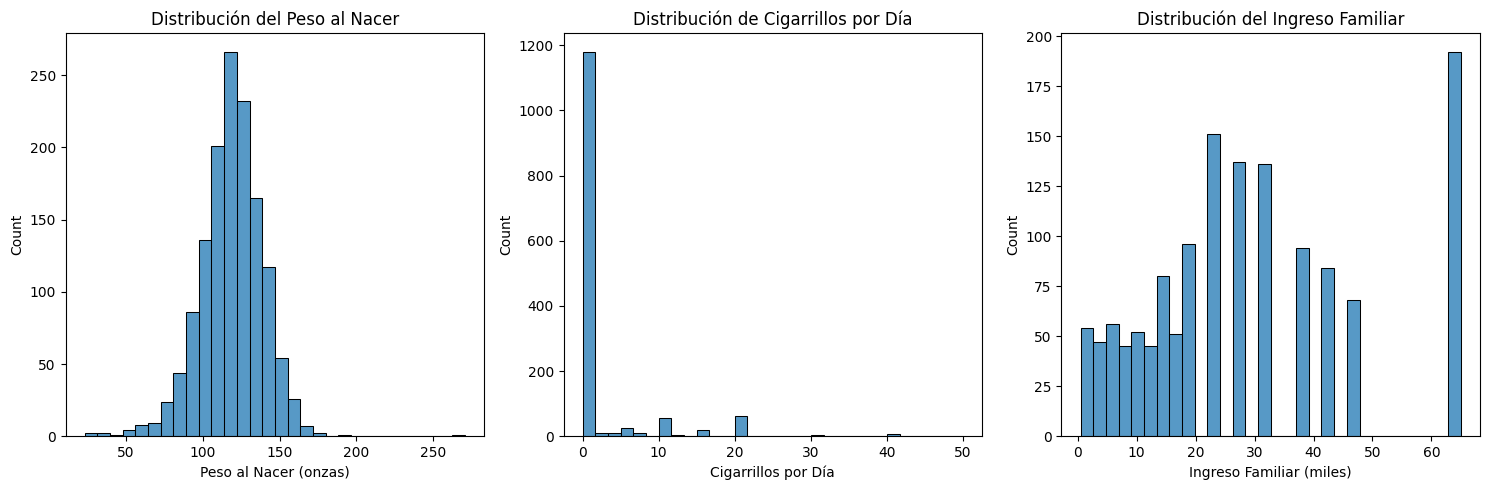


Matriz de correlación:
           bwght      cigs    faminc
bwght   1.000000 -0.150762  0.108937
cigs   -0.150762  1.000000 -0.173045
faminc  0.108937 -0.173045  1.000000


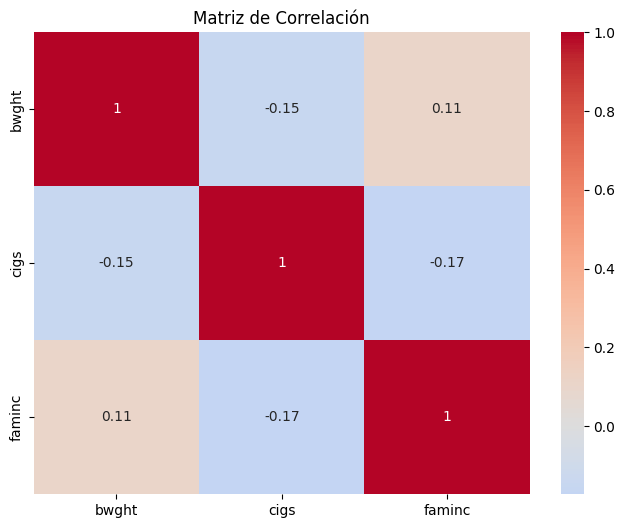

In [15]:

# Importar biblioteca para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con tres subplots para histogramas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para peso al nacer (bwght)
sns.histplot(data=data, x='bwght', bins=30, ax=ax1)
ax1.set_title('Distribución del Peso al Nacer')
ax1.set_xlabel('Peso al Nacer (onzas)')

# Histograma para cigarrillos (cigs)
sns.histplot(data=data, x='cigs', bins=30, ax=ax2)
ax2.set_title('Distribución de Cigarrillos por Día')
ax2.set_xlabel('Cigarrillos por Día')

# Histograma para ingreso familiar (faminc)
sns.histplot(data=data, x='faminc', bins=30, ax=ax3)
ax3.set_title('Distribución del Ingreso Familiar')
ax3.set_xlabel('Ingreso Familiar (miles)')

plt.tight_layout()
plt.show()

# Matriz de correlación
print("\nMatriz de correlación:")
correlation_matrix = data[['bwght', 'cigs', 'faminc']].corr()
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

### Estimación del modelo

In [17]:
# Modelo 1: sin faminc
modelo1 = ols('bwght ~ cigs', data=data).fit()

# Obtener los resultados del primer modelo
print("\nResultados del Modelo 1 (sin faminc):")
print(modelo1.summary().tables[1])

# Extraer coeficientes y R-cuadrado
beta0_m1 = modelo1.params[0]  # intercepto
beta1_m1 = modelo1.params[1]  # coeficiente de cigs
r2_m1 = modelo1.rsquared
n_m1 = modelo1.nobs

# Imprimir ecuación 
print("\nEcuación estimada Modelo simple:")
print(f"bwght = {beta0_m1:.2f} + ({beta1_m1:.3f})cigs")
print(f"n = {n_m1:.0f}")
print(f"R² = {r2_m1:.4f}")


Resultados del Modelo 1 (sin faminc):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.7719      0.572    209.267      0.000     118.649     120.895
cigs          -0.5138      0.090     -5.678      0.000      -0.691      -0.336

Ecuación estimada Modelo simple:
bwght = 119.77 + (-0.514)cigs
n = 1388
R² = 0.0227


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\1567648410.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0_m1 = modelo1.params[0]  # intercepto
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\1567648410.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_m1 = modelo1.params[1]  # coeficiente de cigs


In [18]:
# Modelo 2: con faminc
modelo2 = ols('bwght ~ cigs + faminc', data=data).fit()

# Obtener los resultados del segundo modelo
print("\nResultados del Modelo 2 (con faminc):")
print(modelo2.summary().tables[1])

# Extraer coeficientes y R-cuadrado
beta0_m2 = modelo2.params[0]  # intercepto
beta1_m2 = modelo2.params[1]  # coeficiente de cigs
beta2_m2 = modelo2.params[2]  # coeficiente de faminc
r2_m2 = modelo2.rsquared
n_m2 = modelo2.nobs

# Imprimir ecuación
print("\nEcuación estimada Modelo compuesto:")
print(f"bwght = {beta0_m2:.2f} + ({beta1_m2:.3f})cigs + ({beta2_m2:.3f})faminc")
print(f"n = {n_m2:.0f}")
print(f"R² = {r2_m2:.4f}")

# Comparación de modelos
print("\nComparación de modelos:")
print(f"Efecto de cigs en Modelo 1: {beta1_m1:.3f}")
print(f"Efecto de cigs en Modelo 2: {beta1_m2:.3f}")
print(f"Diferencia en R²: {(r2_m2 - r2_m1):.4f}")


Resultados del Modelo 2 (con faminc):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9741      1.049    111.512      0.000     114.916     119.032
cigs          -0.4634      0.092     -5.060      0.000      -0.643      -0.284
faminc         0.0928      0.029      3.178      0.002       0.036       0.150

Ecuación estimada Modelo compuesto:
bwght = 116.97 + (-0.463)cigs + (0.093)faminc
n = 1388
R² = 0.0298

Comparación de modelos:
Efecto de cigs en Modelo 1: -0.514
Efecto de cigs en Modelo 2: -0.463
Diferencia en R²: 0.0071


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\2966127066.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0_m2 = modelo2.params[0]  # intercepto
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\2966127066.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_m2 = modelo2.params[1]  # coeficiente de cigs
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\2966127066.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

### Discusión




Efecto en el coeficiente de cigs:

Modelo 1: -0.514    fumar un cigarrillo adicional reduce el peso en 0.514 onzas

Modelo 2: -0.463    fumar un cigarrillo adicional reduce el peso en 0.463 onzas

Cambio: 0.051 (reducción de 9.9%)

Agregar faminc no hizo un cambio substancial porque:

- La modificación en el coeficiente de cigs fue menor
- El incremento en R² fue muy pequeño
- Las conclusiones principales sobre el efecto negativo del fumar no cambiaron
- La significancia estadística y relevancia práctica se mantuvieron similares

## C2
Use the data in HPRICE1.RAW to estimate the model
price = b0 + b1sqrft + b2bdrms + u,
where price is the house price measured in thousands of dollars



### Cargar datos

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns




Primeras filas del dataset:
   price      assess  bdrms  lotsize  sqrft  colonial    lprice   lassess  \
0  300.0  349.100006      4   6126.0   2438         1  5.703783  5.855359   
1  370.0  351.500000      3   9903.0   2076         1  5.913503  5.862210   
2  191.0  217.699997      3   5200.0   1374         0  5.252274  5.383118   
3  195.0  231.800003      3   4600.0   1448         1  5.273000  5.445875   
4  373.0  319.100006      4   6095.0   2514         1  5.921578  5.765504   

   llotsize    lsqrft  
0  8.720297  7.798934  
1  9.200593  7.638198  
2  8.556414  7.225482  
3  8.433811  7.277938  
4  8.715224  7.829630  

Estadísticas descriptivas de las variables relevantes:
            price        sqrft      bdrms
count   88.000000    88.000000  88.000000
mean   293.546034  2013.693182   3.568182
std    102.713445   577.191583   0.841393
min    111.000000  1171.000000   2.000000
25%    230.000000  1660.500000   3.000000
50%    265.500000  1845.000000   3.000000
75%    326.250

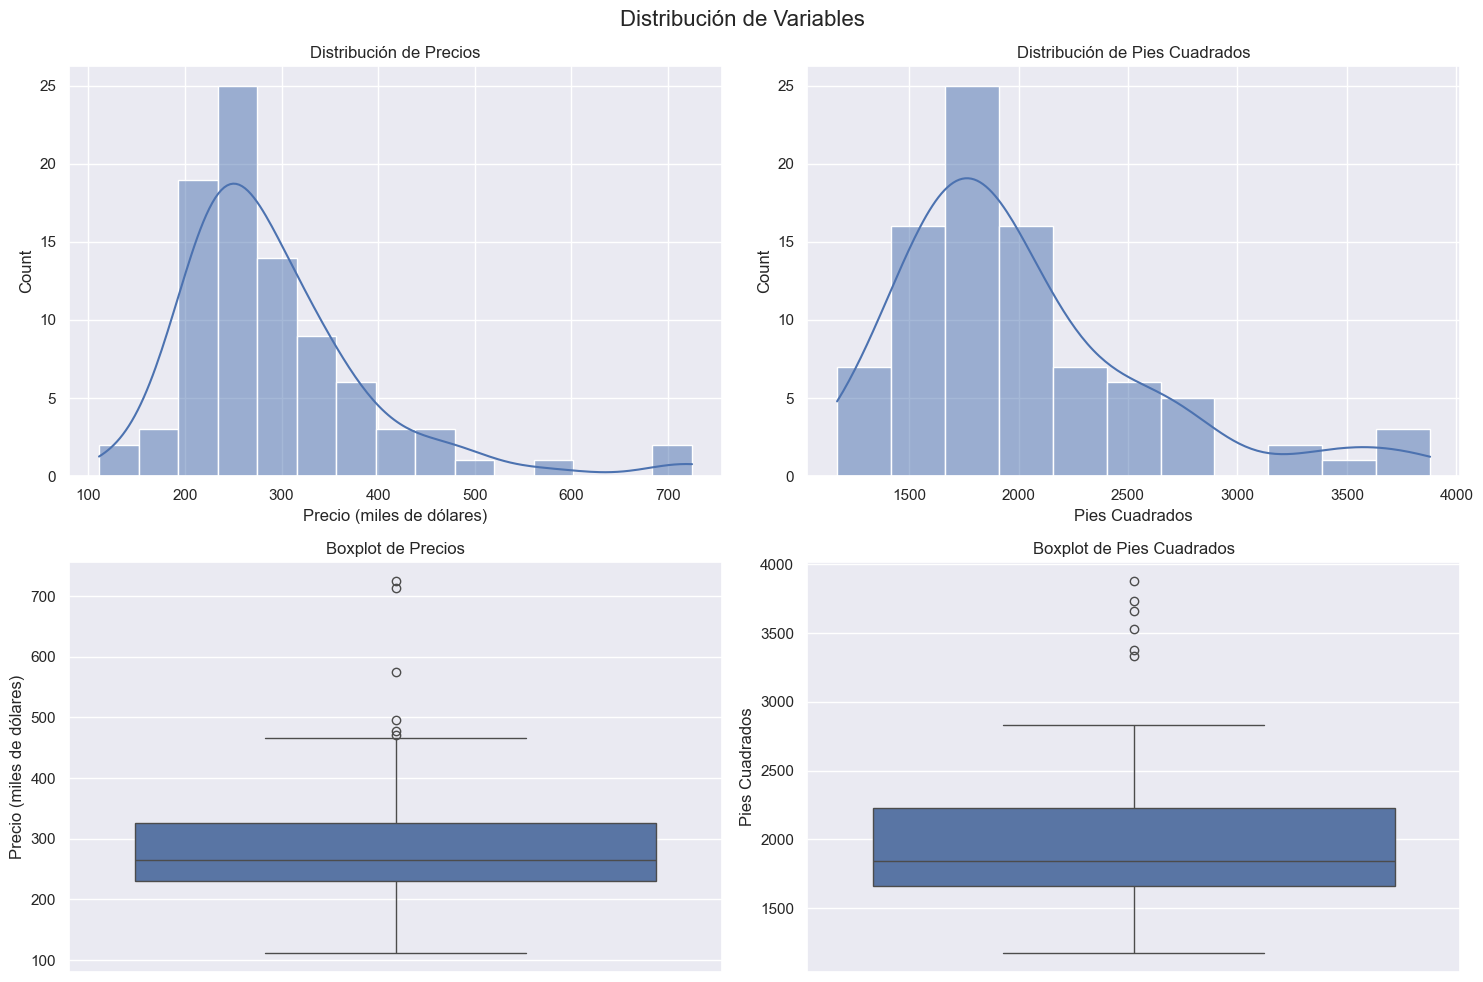

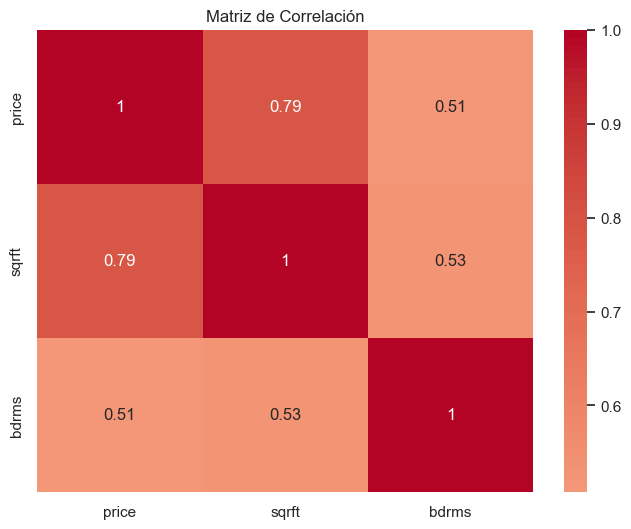

In [27]:
from wooldridge import data
house = data('hprice1')

# Mostrar las primeras filas
print("\nPrimeras filas del dataset:")
print(house.head())

# Estadísticas descriptivas (solo para las variables de interés)
print("\nEstadísticas descriptivas de las variables relevantes:")
print(house[['price', 'sqrft', 'bdrms']].describe())

# Análisis de distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables', fontsize=16)

# Histogramas y densidad
sns.histplot(house['price'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución de Precios')
axes[0,0].set_xlabel('Precio (miles de dólares)')

sns.histplot(house['sqrft'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Pies Cuadrados')
axes[0,1].set_xlabel('Pies Cuadrados')

# Boxplots
sns.boxplot(y=house['price'], ax=axes[1,0])
axes[1,0].set_title('Boxplot de Precios')
axes[1,0].set_ylabel('Precio (miles de dólares)')

sns.boxplot(y=house['sqrft'], ax=axes[1,1])
axes[1,1].set_title('Boxplot de Pies Cuadrados')
axes[1,1].set_ylabel('Pies Cuadrados')

plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = house[['price', 'sqrft', 'bdrms']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

### Estimación

In [29]:
# Preparar variables para el modelo
X = house[['sqrft', 'bdrms']]
y = house['price']

# Añadir constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Mostrar resultados
print("\nResultados de la Regresión:")
print(modelo.summary())  # Solo muestra la tabla de coeficientes

# Mostrar la ecuación estimada
print("\nEcuación estimada:")
print(f"price = {modelo.params[0]:.2f} + {modelo.params[1]:.2f}*sqrft + {modelo.params[2]:.2f}*bdrms")

# Mostrar R-cuadrado
print(f"\nR-cuadrado: {modelo.rsquared:.4f}")
print(f"R-cuadrado ajustado: {modelo.rsquared_adj:.4f}")


Resultados de la Regresión:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           3.57e-19
Time:                        19:58:58   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3150  

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\4031070658.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"price = {modelo.params[0]:.2f} + {modelo.params[1]:.2f}*sqrft + {modelo.params[2]:.2f}*bdrms")


### Discusión

(i) Write out the results in equation form.
price = -19.31 + 0.13sqrft + 15.20bdrms

(ii) What is the estimated increase in price for a house with one more bedroom, holding square footage constant?
15.2k
(iii) What is the estimated increase in price for a house with an additional bedroom that 
is 140 square feet in size? 15.2 + 18.2 si se aumentan los pies cuadrados junto al nuevo cuarto. 
33.4 total

(iv) What percentage of the variation in price is explained by square footage and number of bedrooms?
La media de precio es 293, por lo que  .13/293 = 0.04% por pie cuadrado y 15.2/293 = 05.19% por cuarto


(v) The first house in the sample has sqrft = 2,438 and bdrms = 4. Find the predicted 
selling price for this house from the OLS regression line.  $354.61k

(vi) The actual selling price of the first house in the sample was $300,000 (so price 5
300). Find the residual for this house. Does it suggest that the buyer underpaid or 
overpaid for the house?

In [30]:
# (v) Valores de la casa
sqrft = 2438
bdrms = 4

# Predicción 
precio_estimado = modelo.params[0] + modelo.params[1]*sqrft + modelo.params[2]*bdrms

print(f"\nEl precio estimado es: ${precio_estimado:.2f}k")
print(f"(${precio_estimado*1000:,.2f})")


El precio estimado es: $354.61k
($354,605.25)


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_5008\2520430060.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precio_estimado = modelo.params[0] + modelo.params[1]*sqrft + modelo.params[2]*bdrms


## C3

 Use the data in ATTEND.RAW for this exercise

 (i) Obtain the minimum, maximum, and average values for the variables atndrte, 
priGPA, and ACT.

(ii) Estimate the model

atndrte = b0 + b1priGPA + b2ACT + u,

 and write the results in equation form. Interpret the intercept. Does it have a useful 
meaning?

(iii) Discuss the estimated slope coefficients. Are there any surprises?

(iv) What is the predicted atndrte if priGPA 5 3.65 and ACT 5 20? What do you 
make of this result? Are there any students in the sample with these values of the 
explanatory variables?

(v) If Student A has priGPA 5 3.1 and ACT 5 21 and Student B has priGPA 5 2.1 
and ACT 5 26, what is the predicted difference in their attendance rates?

In [1]:
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Cargar los datos
data = woo.data('attend')

# (i) Estadísticas descriptivas
stats_df = data[['atndrte', 'priGPA', 'ACT']].agg(['min', 'max', 'mean'])
print("\nEstadísticas Descriptivas:")
print(stats_df)

# (ii) Estimación del modelo
X = data[['priGPA', 'ACT']]
X = sm.add_constant(X)  # Agregar constante para el término b0
y = data['atndrte']

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Obtener los coeficientes y errores estándar
coef = model.params
se = model.bse
r2 = model.rsquared

print("\nResultados de la Regresión:")
print(model.summary())

# Crear ecuación en formato legible
equation = f"""
Ecuación estimada:
atndrte = {coef[0]:.3f} + {coef[1]:.3f}*priGPA + {coef[2]:.3f}*ACT
          ({se[0]:.3f})  ({se[1]:.3f})      ({se[2]:.3f})

R² = {r2:.3f}
"""
print(equation)


Estadísticas Descriptivas:
         atndrte    priGPA        ACT
min     6.250000  0.857000  13.000000
max   100.000000  3.930000  32.000000
mean   81.709559  2.586775  22.510294

Resultados de la Regresión:
                            OLS Regression Results                            
Dep. Variable:                atndrte   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.39e-51
Time:                        17:42:25   Log-Likelihood:                -2776.1
No. Observations:                 680   AIC:                             5558.
Df Residuals:                     677   BIC:                             5572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
 

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\1570251729.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atndrte = {coef[0]:.3f} + {coef[1]:.3f}*priGPA + {coef[2]:.3f}*ACT
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\1570251729.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ({se[0]:.3f})  ({se[1]:.3f})      ({se[2]:.3f})


In [2]:
import wooldridge as woo
import pandas as pd
import numpy as np

# Cargar los datos
data = woo.data('attend')

# Definir un rango cercano para buscar valores similares
priGPA_range = (3.5, 3.8)  # ±0.15 alrededor de 3.65
ACT_range = (18, 22)      # ±2 alrededor de 20

# Filtrar los datos
similar_cases = data[
    (data['priGPA'].between(*priGPA_range)) & 
    (data['ACT'].between(*ACT_range))
]

print("\nCasos similares encontrados:")
print(similar_cases[['priGPA', 'ACT', 'atndrte']])

print("\nEstadísticas descriptivas de los casos similares:")
print(similar_cases[['priGPA', 'ACT', 'atndrte']].describe())

# Verificar el rango total de valores en el dataset
print("\nRango total de valores en el dataset:")
print(data[['priGPA', 'ACT', 'atndrte']].describe())


Casos similares encontrados:
     priGPA  ACT  atndrte
37     3.57   21    100.0
568    3.65   20     87.5
665    3.54   19    100.0
677    3.61   22    100.0

Estadísticas descriptivas de los casos similares:
         priGPA        ACT  atndrte
count  4.000000   4.000000    4.000
mean   3.592500  20.500000   96.875
std    0.047871   1.290994    6.250
min    3.540000  19.000000   87.500
25%    3.562500  19.750000   96.875
50%    3.590000  20.500000  100.000
75%    3.620000  21.250000  100.000
max    3.650000  22.000000  100.000

Rango total de valores en el dataset:
           priGPA         ACT     atndrte
count  680.000000  680.000000  680.000000
mean     2.586775   22.510294   81.709559
std      0.544714    3.490768   17.046991
min      0.857000   13.000000    6.250000
25%      2.190000   20.000000   75.000000
50%      2.560000   22.000000   87.500000
75%      2.942500   25.000000   93.750000
max      3.930000   32.000000  100.000000


In [3]:
# Definir los coeficientes
b0 = 75.700
b1 = 17.261
b2 = -1.717

# Estudiante A
priGPA_A = 3.1
ACT_A = 21
pred_A = b0 + b1*priGPA_A + b2*ACT_A

# Estudiante B
priGPA_B = 2.1
ACT_B = 26
pred_B = b0 + b1*priGPA_B + b2*ACT_B

# Calcular diferencia
diff = pred_A - pred_B

print(f"Predicción Estudiante A: {pred_A:.3f}%")
print(f"Predicción Estudiante B: {pred_B:.3f}%")
print(f"Diferencia (A - B): {diff:.3f} puntos porcentuales")

# Desglose de las contribuciones a la diferencia
priGPA_effect = b1 * (priGPA_A - priGPA_B)
ACT_effect = b2 * (ACT_A - ACT_B)

print("\nDesglose de la diferencia:")
print(f"Efecto de la diferencia en priGPA: {priGPA_effect:.3f}")
print(f"Efecto de la diferencia en ACT: {ACT_effect:.3f}")
print(f"Diferencia total: {priGPA_effect + ACT_effect:.3f}")

Predicción Estudiante A: 93.152%
Predicción Estudiante B: 67.306%
Diferencia (A - B): 25.846 puntos porcentuales

Desglose de la diferencia:
Efecto de la diferencia en priGPA: 17.261
Efecto de la diferencia en ACT: 8.585
Diferencia total: 25.846


         atndrte    priGPA        ACT
min     6.250000  0.857000  13.000000
max   100.000000  3.930000  32.000000
mean   81.709559  2.586775  22.510294

atndrte = 75.700 + 17.261*priGPA + -1.717*ACT
          (3.884)  (1.083)      (0.169)

when priGPA and ACT are 0, atndrte = 75.7. This is of no practical use because both values are never 0.

THe slope coefficients are 1.083 and -1.717. ACT is negative, which is a suprise. It is not statistically significant and its effect is small.

When priGPA = 3.65 and ACT = 20, attndrate goes over 100%. This is a limitation of the linear regression model. There are some entries close to these values, and their attndrate is 100% or close to it.

If Student A has priGPA = 3.1 and ACT = 21 and Student B has priGPA = 2.1 and ACT = 26, the difference is of 25%. This shows that prigpa is much more relevant to the analysis

## C6

Use the data set in WAGE2.RAW for this problem. As usual, be sure all of the following regressions contain an intercept.

(i) Regresión de IQ sobre educ (δ₁)

(ii) Regresión de log(wage) sobre educ (β̃₁)

(iii) Regresión múltiple de log(wage) sobre educ e IQ (β̂₁ y β̂₂)

(iv) Verificación de la relación β̃₁ = β̂₁ + β̂₂δ₁:

In [6]:
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tabulate import tabulate

# Cargar los datos
data = woo.data('wage2')

def print_equation(name, y_var, x_vars, coefficients, r_squared):
    """
    Imprime una ecuación de regresión en formato legible
    """
    equation = f"{name}: {y_var} = {coefficients[0]:.4f}"
    for i, (var, coef) in enumerate(zip(x_vars, coefficients[1:]), 1):
        sign = '+' if coef >= 0 else ''
        equation += f" {sign}{coef:.4f}·{var}"
    equation += f"\n    R² = {r_squared:.4f}"
    return equation

# (i) Regresión de IQ sobre educ
X_1 = data['educ'].values.reshape(-1, 1)
y_1 = data['IQ'].values
X_1_const = sm.add_constant(X_1)
model_1 = sm.OLS(y_1, X_1_const).fit()
delta_1 = model_1.params[1]

# (ii) Regresión de log(wage) sobre educ
y_2 = np.log(data['wage'].values)
X_2_const = X_1_const
model_2 = sm.OLS(y_2, X_2_const).fit()
beta_tilde = model_2.params[1]

# (iii) Regresión múltiple de log(wage) sobre educ e IQ
X_3 = np.column_stack((data['educ'], data['IQ']))
X_3_const = sm.add_constant(X_3)
model_3 = sm.OLS(y_2, X_3_const).fit()
beta_1_hat = model_3.params[1]
beta_2_hat = model_3.params[2]

# Crear un resumen detallado
print("\n=== ANÁLISIS DETALLADO DE REGRESIONES ===\n")

print("1. ECUACIONES DE REGRESIÓN:")
print("-" * 50)
print(print_equation("Regresión 1", "IQ", ["educ"], model_1.params, model_1.rsquared))
print(print_equation("Regresión 2", "log(wage)", ["educ"], model_2.params, model_2.rsquared))
print(print_equation("Regresión 3", "log(wage)", ["educ", "IQ"], model_3.params, model_3.rsquared))

print("\n2. COEFICIENTES CLAVE:")
print("-" * 50)
coef_table = [
    ["δ₁ (IQ sobre educ)", delta_1, "Cambio en IQ por año de educación"],
    ["β̃₁ (log(wage) sobre educ)", beta_tilde, "Efecto total de educación sobre log(wage)"],
    ["β̂₁ (educ en reg. múltiple)", beta_1_hat, "Efecto directo de educación sobre log(wage)"],
    ["β̂₂ (IQ en reg. múltiple)", beta_2_hat, "Efecto de IQ sobre log(wage)"]
]
print(tabulate(coef_table, headers=["Coeficiente", "Valor", "Interpretación"], floatfmt=".4f"))

print("\n3. VERIFICACIÓN DE LA RELACIÓN β̃₁ = β̂₁ + β̂₂δ₁:")
print("-" * 50)
print(f"Lado izquierdo (β̃₁)     = {beta_tilde:.6f}")
print(f"β̂₁                       = {beta_1_hat:.6f}")
print(f"β̂₂                       = {beta_2_hat:.6f}")
print(f"δ₁                       = {delta_1:.6f}")
print(f"β̂₂ × δ₁                  = {beta_2_hat * delta_1:.6f}")
print(f"Lado derecho (β̂₁ + β̂₂δ₁) = {(beta_1_hat + beta_2_hat * delta_1):.6f}")
print(f"Diferencia              = {abs(beta_tilde - (beta_1_hat + beta_2_hat * delta_1)):.6f}")

print("\n4. DESCOMPOSICIÓN DEL EFECTO TOTAL:")
print("-" * 50)
print(f"Efecto total de educación (β̃₁)     = {beta_tilde:.6f}")
print(f"  Efecto directo (β̂₁)              = {beta_1_hat:.6f} ({(beta_1_hat/beta_tilde*100):.1f}%)")
print(f"  Efecto indirecto (β̂₂δ₁)          = {(beta_2_hat * delta_1):.6f} ({(beta_2_hat * delta_1/beta_tilde*100):.1f}%)")

print("\n5. INTERPRETACIÓN ECONÓMICA:")
print("-" * 50)
print(f"• Un año adicional de educación está asociado con un aumento de {delta_1:.2f} puntos en el IQ")
print(f"• El efecto total de un año de educación sobre el salario es aproximadamente {(np.exp(beta_tilde)-1)*100:.1f}%")
print(f"• Controlando por IQ, el efecto directo de la educación sobre el salario es {(np.exp(beta_1_hat)-1)*100:.1f}%")
print(f"• Un punto adicional de IQ está asociado con un aumento de {(np.exp(beta_2_hat)-1)*100:.2f}% en el salario")

# Añadir estadísticas descriptivas básicas
print("\n6. ESTADÍSTICAS DESCRIPTIVAS:")
print("-" * 50)
desc_stats = data[['wage', 'educ', 'IQ']].describe()
print(desc_stats)


=== ANÁLISIS DETALLADO DE REGRESIONES ===

1. ECUACIONES DE REGRESIÓN:
--------------------------------------------------
Regresión 1: IQ = 53.6872 +3.5338·educ
    R² = 0.2659
Regresión 2: log(wage) = 5.9731 +0.0598·educ
    R² = 0.0974
Regresión 3: log(wage) = 5.6583 +0.0391·educ +0.0059·IQ
    R² = 0.1297

2. COEFICIENTES CLAVE:
--------------------------------------------------
Coeficiente                   Valor  Interpretación
--------------------------  -------  -------------------------------------------
δ₁ (IQ sobre educ)           3.5338  Cambio en IQ por año de educación
β̃₁ (log(wage) sobre educ)    0.0598  Efecto total de educación sobre log(wage)
β̂₁ (educ en reg. múltiple)   0.0391  Efecto directo de educación sobre log(wage)
β̂₂ (IQ en reg. múltiple)     0.0059  Efecto de IQ sobre log(wage)

3. VERIFICACIÓN DE LA RELACIÓN β̃₁ = β̂₁ + β̂₂δ₁:
--------------------------------------------------
Lado izquierdo (β̃₁)     = 0.059839
β̂₁                       = 0.039120
β̂₂   

## C7 

Use the data in MEAP93.RAW to answer this question.

(i) Estimate the model
math10 = β₀ (intercepto) + β₁ (log(expend)) + β₂ (lnchprg) 

Are the signs of the slope coefficients what you expected? Explain.


(ii) What do you make of the intercept you estimated in part (i)? In particular, does 
it make sense to set the two explanatory variables to zero? [Hint: Recall that 
log(1) = 0.


Modelo múltiple:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.3608     25.073     -0.812      0.417     -69.650      28.928
lexpend        6.2297      2.973      2.096      0.037       0.386      12.073
lnchprg       -0.3046      0.035     -8.614      0.000      -0.374      -0.235

R-squared: 0.1799
Tamaño de muestra: 408

Modelo simple:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.3412     26.530     -2.614      0.009    -121.495     -17.188
lexpend       11.1644      3.169      3.523      0.000       4.935      17.394

Correlación entre log(expend) y lnchprg: -0.1927


Text(0.5, 1.0, 'Correlación entre log(expend) y lnchprg')

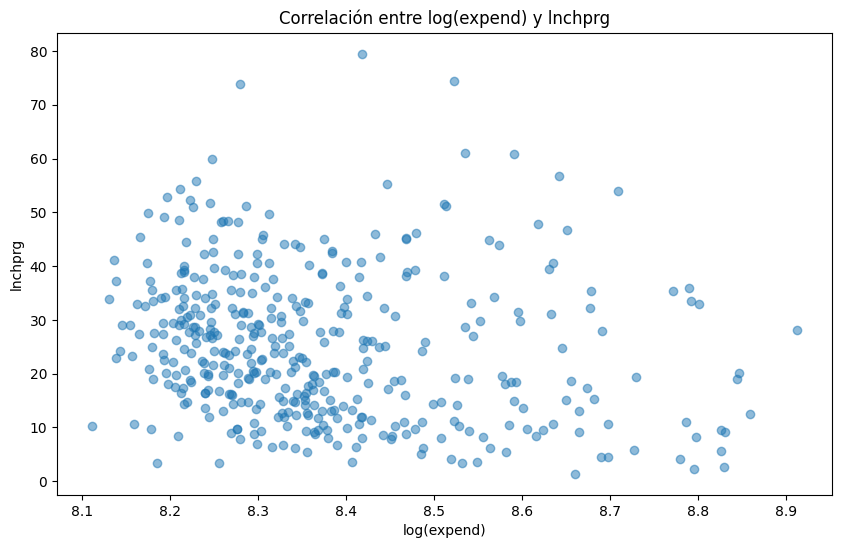

In [7]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datos
data = woo.data('meap93')

# (i) Estimar el modelo múltiple
# Crear variables logarítmicas
data['lexpend'] = np.log(data['expend'])
data['lnchprg'] = data['lnchprg']  # ya está en log

# Preparar X (incluyendo constante) y y
X = sm.add_constant(data[['lexpend', 'lnchprg']])
y = data['math10']

# Estimar el modelo
model = sm.OLS(y, X).fit()
print("\nModelo múltiple:")
print(model.summary().tables[1])
print(f"\nR-squared: {model.rsquared:.4f}")
print(f"Tamaño de muestra: {len(data)}")

# (iii) Regresión simple de math10 en log(expend)
X_simple = sm.add_constant(data['lexpend'])
model_simple = sm.OLS(y, X_simple).fit()
print("\nModelo simple:")
print(model_simple.summary().tables[1])

# (iv) Correlación entre lexpend y lnchprg
correlation = data['lexpend'].corr(data['lnchprg'])
print(f"\nCorrelación entre log(expend) y lnchprg: {correlation:.4f}")

# Visualización de la correlación
plt.figure(figsize=(10, 6))
plt.scatter(data['lexpend'], data['lnchprg'], alpha=0.5)
plt.xlabel('log(expend)')
plt.ylabel('lnchprg')
plt.title('Correlación entre log(expend) y lnchprg')

A raise in the expenditure is associated with a better result in math. Meanwhile, lunch program is associated with a lower y. This should be expected because lunch program should be correlated with a lower socioeconomical status. 

The effect of expend is higher in the simple regression model. The correlation between the two independent variables is negative, this is consistent with the socioeconomical rationale, in which schools with more lunch programs tend to be in areas with less expenditures.

The difference between the effects of expenditure can be explained by the omitted variable's effect. Log(expend) captures the negative effect of the lunch program, therefore, including it to the model allows us to control the variable's effect.

## C8



In [9]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Cargar los datos
data = woo.data('discrim')

# Verificar datos faltantes
print("Verificación de datos faltantes:")
print(data[['prpblck', 'income', 'psoda']].isnull().sum())


Verificación de datos faltantes:
prpblck    1
income     1
psoda      8
dtype: int64


In [10]:

# Limpiar datos: eliminar filas con valores faltantes o infinitos
data_clean = data.replace([np.inf, -np.inf], np.nan)
data_clean = data_clean.dropna(subset=['prpblck', 'income', 'psoda'])

# (i) Estadísticas descriptivas para prpblck e income
print("\nEstadísticas Descriptivas:")
print("Proporción de población negra (prpblck):")
print(f"Media: {data_clean['prpblck'].mean():.4f}")
print(f"Desviación estándar: {data_clean['prpblck'].std():.4f}")

print("\nIngreso medio (income):")
print(f"Media: ${data_clean['income'].mean():,.2f}")
print(f"Desviación estándar: ${data_clean['income'].std():,.2f}")

# (ii) Modelo OLS
# Preparar variables
X = sm.add_constant(data_clean[['prpblck', 'income']])
y = data_clean['psoda']

# Estimar el modelo
model = sm.OLS(y, X).fit()

# Imprimir resultados detallados
print("\nResultados de la Regresión OLS:")
print(f"\nNúmero de observaciones: {model.nobs}")
print(f"R-cuadrado: {model.rsquared:.4f}")
print("\nCoeficientes:")
print(model.summary().tables[1])

# Crear ecuación estimada
b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]
print(f"\nEcuación estimada:")
print(f"psoda = {b0:.4f} + {b1:.4f}*prpblck + {b2:.8f}*income")

# Análisis adicional de los coeficientes
print("\nInterpretación económica:")
print(f"Un aumento de 10 puntos porcentuales en la proporción de población negra")
print(f"está asociado con un cambio de ${b1*0.1:.4f} en el precio de la soda")

# Calcular el efecto de un cambio de una desviación estándar en prpblck
sd_effect = b1 * data_clean['prpblck'].std()
print(f"\nEfecto de una desviación estándar en prpblck: ${sd_effect:.4f}")


Estadísticas Descriptivas:
Proporción de población negra (prpblck):
Media: 0.1150
Desviación estándar: 0.1839

Ingreso medio (income):
Media: $46,999.40
Desviación estándar: $13,215.33

Resultados de la Regresión OLS:

Número de observaciones: 401.0
R-cuadrado: 0.0642

Coeficientes:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9563      0.019     50.354      0.000       0.919       0.994
prpblck        0.1150      0.026      4.423      0.000       0.064       0.166
income      1.603e-06   3.62e-07      4.430      0.000    8.91e-07    2.31e-06

Ecuación estimada:
psoda = 0.9563 + 0.1150*prpblck + 0.00000160*income

Interpretación económica:
Un aumento de 10 puntos porcentuales en la proporción de población negra
está asociado con un cambio de $0.0115 en el precio de la soda

Efecto de una desviación estándar en prpblck: $0.0211


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\1965958677.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = model.params[0]
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\1965958677.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = model.params[1]
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\1965958677.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b2 = model.params[2]


In [11]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Cargar y limpiar datos
data = woo.data('discrim')
data_clean = data.replace([np.inf, -np.inf], np.nan)
data_clean = data_clean.dropna(subset=['prpblck', 'income', 'psoda'])

# Modelo 1: Regresión múltiple (original)
X_multiple = sm.add_constant(data_clean[['prpblck', 'income']])
y = data_clean['psoda']
model_multiple = sm.OLS(y, X_multiple).fit()

# Modelo 2: Regresión simple
X_simple = sm.add_constant(data_clean[['prpblck']])
model_simple = sm.OLS(y, X_simple).fit()

# Comparar resultados
print("Comparación de Coeficientes para prpblck:")
print("\n1. Modelo con control de ingreso:")
print(f"Coeficiente: {model_multiple.params['prpblck']:.4f}")
print(f"Error estándar: {model_multiple.bse[1]:.4f}")
print(f"Valor p: {model_multiple.pvalues[1]:.4f}")

print("\n2. Modelo simple (sin control de ingreso):")
print(f"Coeficiente: {model_simple.params['prpblck']:.4f}")
print(f"Error estándar: {model_simple.bse[1]:.4f}")
print(f"Valor p: {model_simple.pvalues[1]:.4f}")

# Calcular la diferencia porcentual
diff_pct = ((model_multiple.params['prpblck'] - model_simple.params['prpblck']) / 
            model_simple.params['prpblck'] * 100)

print("\nAnálisis de la diferencia:")
print(f"Diferencia absoluta: {model_multiple.params['prpblck'] - model_simple.params['prpblck']:.4f}")
print(f"Diferencia porcentual: {diff_pct:.1f}%")

# Mostrar ecuaciones estimadas
print("\nEcuaciones estimadas:")
print(f"Modelo múltiple: psoda = {model_multiple.params[0]:.4f} + {model_multiple.params[1]:.4f}*prpblck + {model_multiple.params[2]:.8f}*income")
print(f"Modelo simple: psoda = {model_simple.params[0]:.4f} + {model_simple.params[1]:.4f}*prpblck")

Comparación de Coeficientes para prpblck:

1. Modelo con control de ingreso:
Coeficiente: 0.1150
Error estándar: 0.0260
Valor p: 0.0000

2. Modelo simple (sin control de ingreso):
Coeficiente: 0.0649
Error estándar: 0.0240
Valor p: 0.0070

Análisis de la diferencia:
Diferencia absoluta: 0.0501
Diferencia porcentual: 77.1%

Ecuaciones estimadas:
Modelo múltiple: psoda = 0.9563 + 0.1150*prpblck + 0.00000160*income
Modelo simple: psoda = 1.0374 + 0.0649*prpblck


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\2324424878.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Error estándar: {model_multiple.bse[1]:.4f}")
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\2324424878.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Valor p: {model_multiple.pvalues[1]:.4f}")
C:\Users\Gerardo\AppData\Local\Temp\ipykernel_6784\2324424878.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

In [12]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Cargar y limpiar datos
data = woo.data('discrim')
data_clean = data.replace([np.inf, -np.inf], np.nan)

# Crear variables logarítmicas
data_clean['log_psoda'] = np.log(data_clean['psoda'])
data_clean['log_income'] = np.log(data_clean['income'])

# Eliminar valores faltantes
data_clean = data_clean.dropna(subset=['log_psoda', 'log_income', 'prpblck', 'prppov'])

# Modelo 1: log(psoda) = b0 + b1*prpblck + b2*log(income) + u
X1 = sm.add_constant(data_clean[['prpblck', 'log_income']])
y1 = data_clean['log_psoda']
model1 = sm.OLS(y1, X1).fit()

# Modelo 2: Añadiendo prppov
X2 = sm.add_constant(data_clean[['prpblck', 'log_income', 'prppov']])
model2 = sm.OLS(y1, X2).fit()

# Calcular correlación
corr = data_clean['log_income'].corr(data_clean['prppov'])

# Resultados
print("Modelo 1 (sin prppov):")
print(model1.summary().tables[1])
print("\nEfecto de un aumento de 0.20 en prpblck:")
effect = (np.exp(0.20 * model1.params['prpblck']) - 1) * 100
print(f"Cambio porcentual en psoda: {effect:.2f}%")

print("\nModelo 2 (con prppov):")
print(model2.summary().tables[1])

print("\nCorrelación entre log(income) y prppov:")
print(f"Coeficiente de correlación: {corr:.4f}")

# Diagnóstico de multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("\nFactores de Inflación de Varianza (VIF) para Modelo 2:")
print(calculate_vif(X2))

Modelo 1 (sin prppov):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7938      0.179     -4.424      0.000      -1.147      -0.441
prpblck        0.1216      0.026      4.722      0.000       0.071       0.172
log_income     0.0765      0.017      4.610      0.000       0.044       0.109

Efecto de un aumento de 0.20 en prpblck:
Cambio porcentual en psoda: 2.46%

Modelo 2 (con prppov):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4633      0.294     -4.982      0.000      -2.041      -0.886
prpblck        0.0728      0.031      2.373      0.018       0.013       0.133
log_income     0.1370      0.027      5.119      0.000       0.084       0.190
prppov         0.3804      0.133      2.864      0.004       0.119       0.641

Correla

The effects of racial discrimination is statistically significant, but its effect lowers by 40% when controlling for poverty. This indicates that poverty causes a bigger effect in discrimination in prices rather than race. 

## C9

In [13]:
import wooldridge as woo
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Cargar los datos
charity = woo.data('charity')

# (i) Primera regresión múltiple
X = charity[['mailsyear', 'giftlast', 'propresp']]
X = sm.add_constant(X)
y = charity['gift']
model1 = sm.OLS(y, X).fit()

# Regresión simple para comparar R-squared
X_simple = charity[['mailsyear']]
X_simple = sm.add_constant(X_simple)
model_simple = sm.OLS(y, X_simple).fit()

# (iv) Regresión añadiendo avggift
X2 = charity[['mailsyear', 'giftlast', 'propresp', 'avggift']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

# Imprimir resultados
print("=== Modelo 1: Regresión Múltiple Original ===")
print(model1.summary().tables[1])
print(f"\nR-squared: {model1.rsquared:.4f}")
print("\n=== Modelo Simple (solo mailsyear) ===")
print(model_simple.summary().tables[1])
print(f"\nR-squared: {model_simple.rsquared:.4f}")
print("\n=== Modelo 2: Incluyendo avggift ===")
print(model2.summary().tables[1])
print(f"\nR-squared: {model2.rsquared:.4f}")

# Calcular estadísticas descriptivas para propresp
prop_stats = charity['propresp'].describe()
print("\nEstadísticas descriptivas de propresp:")
print(prop_stats)

=== Modelo 1: Regresión Múltiple Original ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5515      0.803     -5.668      0.000      -6.126      -2.977
mailsyear      2.1663      0.332      6.526      0.000       1.516       2.817
giftlast       0.0059      0.001      4.138      0.000       0.003       0.009
propresp      15.3586      0.875     17.562      0.000      13.644      17.073

R-squared: 0.0834

=== Modelo Simple (solo mailsyear) ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0141      0.739      2.724      0.006       0.564       3.464
mailsyear      2.6495      0.343      7.723      0.000       1.977       3.322

R-squared: 0.0138

=== Modelo 2: Incluyendo avggift ===
                 coef    std err          t     

The simple model's R squared is .01, the first model .08 and the model with avggift is .20. This shows an improvement in the explicative power, specially when adding avggift.

Mailsyear reduces significantly when avggift is introduced, which means that it was being overestimated by its omission

Propresp's mean is .48. So a change in .01 (1 percent), is associated with an increase of .15 or .16 in gift

Giftlast switched from positive to negative. This could be due to multicolinearity

In [14]:
import wooldridge as woo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar los datos
charity = woo.data('charity')

# 1. Matriz de correlación
variables = ['gift', 'mailsyear', 'giftlast', 'propresp', 'avggift']
correlation_matrix = charity[variables].corr()

# 2. Calcular VIF
X = charity[['mailsyear', 'giftlast', 'propresp', 'avggift']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 3. Análisis adicional de la relación entre giftlast y avggift
model_collinearity = sm.OLS(charity['giftlast'], 
                           sm.add_constant(charity[['avggift', 'mailsyear', 'propresp']])).fit()

print("=== Matriz de Correlación ===")
print(correlation_matrix)

print("\n=== Factores de Inflación de Varianza (VIF) ===")
print(vif_data)

print("\n=== Regresión de giftlast sobre otras variables ===")
print(model_collinearity.summary().tables[1])

# Calcular R-cuadrado de la regresión auxiliar
r2_auxiliary = model_collinearity.rsquared
print(f"\nR-cuadrado de la regresión auxiliar: {r2_auxiliary:.4f}")

=== Matriz de Correlación ===
               gift  mailsyear  giftlast  propresp   avggift
gift       1.000000   0.117429  0.057905  0.265400  0.100448
mailsyear  0.117429   1.000000  0.006273  0.081428  0.021336
giftlast   0.057905   0.006273  1.000000 -0.013043  0.992113
propresp   0.265400   0.081428 -0.013043  1.000000 -0.016842
avggift    0.100448   0.021336  0.992113 -0.016842  1.000000

=== Factores de Inflación de Varianza (VIF) ===
    Variable        VIF
0  mailsyear   4.323024
1   giftlast  64.415673
2   propresp   3.702841
3    avggift  66.711051

=== Regresión de giftlast sobre otras variables ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9317      1.069     -9.293      0.000     -12.027      -7.837
avggift        1.9446      0.004    520.944      0.000       1.937       1.952
mailsyear     -3.5352      0.441     -8.007      0.000      -4.401

Giftlast and avggift are almost perfectly correlated. This means that giftlast will be capturing the mean reversion or correction to avggift.


# Functions to perform lineal regression

In [30]:
""" def compute_cost(X, y, w, b):
    m = X.shape[0]
    return (1/(2*m)) * np.sum((w*X + b - y)**2) """

In [31]:
""" def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dw = (1/m) * np.sum((w*x + b - y) * x)
    db = (1/m) * np.sum(w*x + b - y)
    return dw, db
 """

In [32]:
""" def gradient_descent(X, y, w, b, alpha, iterations):
    m = X.shape[0]
    y_pred = np.zeros(y.shape)
    cost_history = []

    for i in range(iterations):
        y_pred = w*X + b
        dw, db = compute_gradient(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    return w, b, cost_history, y_pred
         """

In [33]:
""" def plot_residuals_histogram(residuals):
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=10, color='blue', alpha=0.7)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show() """

In [34]:
""" def calculate_statistics(X, y, y_pred):
    m = X.shape[0]
    residuals = y - y_pred
    residuals_sum_of_squares = np.sum(residuals**2)
    x_mean = np.mean(X)
    total_sum_of_squares = np.sum((X - x_mean)**2)

    # Standard error of the slope (w)
    se_w = np.sqrt((1/(m-2)) * residuals_sum_of_squares / (total_sum_of_squares))
    # t-value for the slope
    t_w = w_final / se_w
    return se_w, t_w """